In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Kurnool']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,...,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,Crop
1701,1916,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.62,0.98,0.37,...,192.0,7280.0,878.0,58.30,0.43,2.71,13.79,1.04,7.36,Chickpea
1702,1917,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.22,0.31,0.32,...,212.0,9156.0,1006.0,4.54,0.40,0.93,13.81,1.29,19.02,Chickpea
1703,1918,15.33,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.27,0.41,0.42,...,299.0,8995.0,1454.0,13.67,0.40,1.14,13.79,1.27,25.99,Chickpea
1704,1919,15.34,78.31,Kurnool,Banaganpalli,Applapuram,Black,8.63,0.23,0.42,...,196.0,7970.0,1164.0,3.45,0.44,1.02,12.29,1.03,8.57,Pigeonpea
1705,1920,15.34,78.32,Kurnool,Banaganpalli,Applapuram,Black,8.56,0.34,0.22,...,200.0,8759.0,1283.0,3.18,0.38,1.16,10.87,1.12,18.94,Jowar


In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,8.080000,0.503658,0.341473,13.335202,147.907363,4124.760095,610.743468,37.752613,0.590119,1.224513,8.605273,1.036271,10.871853
std,0.813024,1.162643,0.135343,12.325002,129.306644,3183.363217,534.631347,162.019220,0.591689,1.357217,5.691184,0.536504,5.732182
min,5.210000,0.030000,0.060000,0.540000,23.000000,145.000000,27.000000,1.690000,0.130000,0.110000,0.740000,0.250000,1.400000
25%,7.640000,0.180000,0.260000,4.670000,92.000000,997.000000,202.000000,5.160000,0.320000,0.490000,4.870000,0.680000,6.560000
50%,8.300000,0.280000,0.330000,9.300000,133.000000,3555.000000,484.000000,8.520000,0.400000,0.860000,7.430000,0.950000,9.740000
75%,8.680000,0.400000,0.410000,19.220000,183.000000,7280.000000,943.000000,18.220000,0.610000,1.400000,10.860000,1.210000,13.670000
max,9.430000,16.950000,1.050000,109.090000,2409.000000,9538.000000,5363.000000,2539.580000,6.110000,13.730000,41.370000,3.440000,40.170000


In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black', 'Nalla regadi', 'Red', 'Chowdu', 'Black & Red', 'Garuku',
       'Red ', 'Sowdu', 'Sudda', 'Thella kattu', 'Black & Mooru',
       'Chowdu +Nalla regadi', 'Sand+Ondu+White', 'Sudda Neela',
       'Sand +Ondu', 'Sand', 'Gurugu ', 'Tella masaka',
       'Chowdu + Nalla regadi', 'Nalla savudu', 'Regadi', 'Black, chowdu',
       'Chowdu+ Nalla regadi', 'Chowdu+ Red', 'Chowdu +Black',
       'Erra maska', 'Nalla regadi + chowdu', 'Sand +Chowdu',
       'Chowdu Sudda', 'Black + Chowdu', 'Chowdu + Black', 'sand', 'red',
       'Alkhaline'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Red', 'red', 'Chowdu+ Red', 'Red '], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black, chowdu', 'Black + Chowdu', 'Black & Mooru'], 'Black Soil')
df = df[(df['SoilType'] == 'Red Soil') | (df['SoilType'] == 'Black Soil')]

In [10]:
soilCount = dict(df['SoilType'].value_counts())
for i in soilCount.keys():
    if i not in ['Red Soil', 'Black Soil']:
        soilCount.pop(i)
soilCount

{'Red Soil': 158, 'Black Soil': 152}

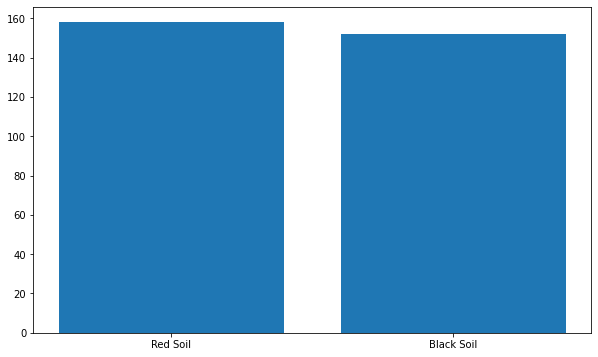

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)
df = df.drop(['SoilType'], axis=1)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Chickpea', 'Pigeonpea', 'Jowar', 'Coriandam', 'Blackgram',
       'Bengalgram', 'Redgram', 'Cotton', 'Paddy', 'JOWAR', 'Paddy,jowar',
       'Fodder Crops', 'Dhanyalu', 'Jonna, Senaga', 'Senaga', 'Pogaku',
       'Mahendra Jonna', 'Merappa ; Senaga', 'Menumu', 'Pacha Jonna',
       'Jonna', 'Vari', 'Sunflower', 'Cottan', 'Ground Nat,Cottan',
       'Oniyan,Ground Nat', 'cotton', 'ground nut',
       'ground nut/groundnut', 'groundnut', 'Cottan,Ground Nat',
       'Grounat', 'Ground Nat', 'Cottan ,Groundnat', 'Cottan,',
       'Groundnut', 'Groundnut,Cottan', 'Ground nut,Cottan',
       'Cottan,Castral', 'GroundNut', 'Castor', 'GroundNut,Cotton',
       'Ground nut', 'Cotton,Vegitable', 'Ground nut,castor',
       'Ground nut ,Mirchi', 'Cotton,Ground Nut', 'Ground Nut',
       'Cotton,castor', 'Ground Nut, Cotton', 'Ground Nut,jowar',
       'Ground Nut ,Cotton', 'Clastor', 'Cotton,Groundnut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Cotton                  83
Groundnut               44
Cottan                  16
Bengalgram              13
Jowar                   11
Senaga                  10
Ground Nut               9
Paddy                    9
Jonna                    8
Coriandam                8
GroundNut                7
Vari                     7
Mahendra Jonna           6
Sunflower                6
Dhanyalu                 5
Cottan,Ground Nat        5
Ground Nat               5
cotton                   4
Blackgram                4
ground nut/groundnut     4
Redgram                  4
Chickpea                 3
Pacha Jonna              2
Paddy,jowar              2
Ground Nut,jowar         2
Groundnut,Cottan         2
Ground nut,castor        2
Clastor                  2
Cotton,Ground Nut        2
Ground Nut, Cotton       1
Ground nut               1
Pigeonpea                1
GroundNut,Cotton         1
Cottan,Castral           1
Ground nut,Cottan        1
ground nut               1
Ground nut ,Mirchi       1
C

GroundNut + Cotton    202
Jowar                  30
BengalGram             25
Coriander              13
Name: Crop, dtype: int64


<BarContainer object of 4 artists>

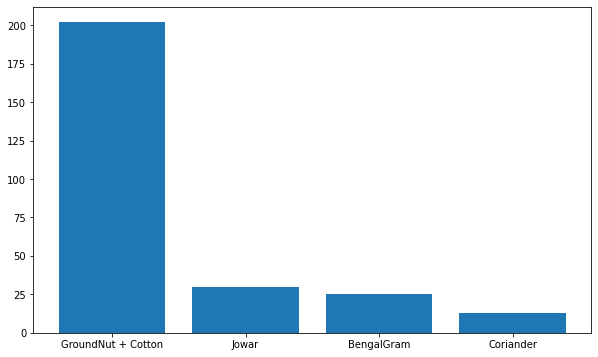

In [15]:
df['Crop'] = df['Crop'].replace('chill', 'Chilli')
df['Crop'] = df['Crop'].replace(['MAZI', 'maize', 'Mazi'], 'Maize')
df['Crop'] = df['Crop'].replace(['Bengalgram', 'Senaga', 'Merappa ; Senaga', 'Erra senaga', 'Jonna, Senaga', 'Jonna/Senaga'], 'BengalGram')
df['Crop'] = df['Crop'].replace(['jowar', 'Jowar', 'JOWAR', 'Jonna', 'Mahendra Jonna', 'Pacha Jonna', 'Erra Jonna', 'Veru senaga, Jonna', 'Jonna+ sunflower', 'Paddy,jowar'],'Jowar')
df['Crop'] = df['Crop'].replace('Vari','BarnyardMillet')
df['Crop'] = df['Crop'].replace(['Dhanyalu', 'Coriandam', 'Dhanyalu , Jonnalu'], 'Coriander')
df['Crop'] = df['Crop'].replace(['Oniyan,Ground Nat', 'ground nut', 'ground nut/groundnut', 'groundnut', 'Grounat', 'Ground Nat', 'Groundnut', 'GroundNut', 'Ground nut', 'Ground nut,castor', 'Ground nut ,Mirchi', 'Ground Nut', 'Ground Nut,jowar'],'GroundNut')
df['Crop'] = df['Crop'].replace(['Cottan', 'cotton', 'Cottan,', 'Cottan,Castral', 'Cotton,Vegitable', 'Cotton,castor'],'Cotton')
df['Crop'] = df['Crop'].replace(['Ground Nat,Cottan', 'Cottan,Ground Nat', 'Cottan ,Groundnat', 'Groundnut,Cottan', 'Ground nut,Cottan', 'GroundNut,Cotton', 'Cotton,Ground Nut', 'Ground Nut, Cotton', 'Ground Nut ,Cotton', 'Cotton,Groundnut', 'Cotton', 'GroundNut'], 'GroundNut + Cotton')
df = df[(df['Crop'] != 'Clastor') & (df['Crop'] != 'Castor') & (df['Crop'] != 'Onian') & (df['Crop'] != 'Korra, Maagu') & (df['Crop'] != 'Menumu') & (df['Crop'] != 'Peasara + Pacha Gaddi')]
df = df[(df['Crop'] != 'Chickpea') & (df['Crop'] != 'Pigeonpea') & (df['Crop'] != 'Blackgram') & (df['Crop'] != 'Redgram') & (df['Crop'] != 'Fodder Crops') & (df['Crop'] != 'Pogaku')]
df = df[(df['Crop'] != 'Sunflower') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'BarnyardMillet')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn
pH,1.000000,0.154581,0.147291,-0.398731,0.350931,0.626788,0.643470,0.075312,-0.127017,0.372085,-0.273208,0.108424,-0.416163
EC,0.154581,1.000000,0.047219,-0.090406,0.135849,0.171570,0.157315,0.898074,-0.009813,0.760557,-0.010272,0.054859,-0.048448
OC,0.147291,0.047219,1.000000,0.342842,0.606173,0.200203,0.247514,0.026382,0.316863,0.156429,0.104527,0.468411,0.272497
P,-0.398731,-0.090406,0.342842,1.000000,0.070703,-0.513249,-0.387599,-0.064982,0.469348,-0.228942,-0.053793,-0.013029,0.173210
K,0.350931,0.135849,0.606173,0.070703,1.000000,0.529954,0.529136,0.076988,0.148299,0.332151,0.263453,0.413098,0.199230
Ca,0.626788,0.171570,0.200203,-0.513249,0.529954,1.000000,0.910068,0.137835,-0.179656,0.484463,0.309439,0.389341,0.018532
Mg,0.643470,0.157315,0.247514,-0.387599,0.529136,0.910068,1.000000,0.129683,-0.059716,0.529157,0.238333,0.465359,0.034844
S,0.075312,0.898074,0.026382,-0.064982,0.076988,0.137835,0.129683,1.000000,0.002336,0.762918,0.001949,0.049728,-0.012802
Zn,-0.127017,-0.009813,0.316863,0.469348,0.148299,-0.179656,-0.059716,0.002336,1.000000,0.033656,-0.070543,0.268873,0.211985
B,0.372085,0.760557,0.156429,-0.228942,0.332151,0.484463,0.529157,0.762918,0.033656,1.000000,0.077278,0.263906,-0.022490


In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'B', 'Mn']
Columns taken into consideration :  ['pH', 'EC', 'OC', 'P', 'Zn', 'Fe', 'Cu', 'Crop']


In [19]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [20]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Zn     Fe    Cu
1705  8.56  0.34  0.22  4.27  0.38  10.87  1.12
1705    Jowar
Name: Crop, dtype: object


In [21]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, :] = sc1.fit_transform(X[:, :])

In [22]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)
# smote = SMOTE()
# X_train, y_train = smote.fit_resample(X_train, y_train)

# K-Nearest Neighbors Classifier

In [23]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [24]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [25]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  0.9900990099009901
Testing Accuracy:  0.8088235294117647


In [26]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.21 %
Standard Deviation: 6.34 %


# Decision Tree Classifier

In [27]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [29]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  0.9900990099009901
Testing Accuracy:  0.7205882352941176


In [30]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.83 %
Standard Deviation: 12.15 %


# Random Forest Classifier

In [63]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [64]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [65]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  0.9900990099009901
Testing Accuracy:  0.8088235294117647


In [66]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 73.74 %
Standard Deviation: 7.15 %


In [67]:
pickle.dump(clf3, open('Kurnool_model.pkl', 'wb'))
pickle.dump(sc1, open('Kurnool_scaler.pkl', 'wb'))

In [68]:
list1 = np.array([5, 0, 0, 0, 0, 0, 0])
list1 = np.array([list1])
list1[:,:] = sc1.transform(list1[:,:])
pred = clf3.predict(list1)

In [69]:
data = pred[0]
probab_list = clf3.predict_proba(list1)[0]

ans = dict()
for i in range(len(clf3.classes_)):
    clf3.classes_[i] = clf3.classes_[i].replace("+", "or")
    ans[clf3.classes_[i]] = "{:.2f}".format((probab_list[i] * 100))

ans_list = [(float(v), k) for k, v in ans.items()]
ans_list.sort(reverse=True)
res = dict()
res['final_ans'] = ans_list
res['district_name'] = "Kurnool"

In [70]:
print(res)

{'final_ans': [(77.0, 'GroundNut or Cotton'), (13.0, 'Jowar'), (9.0, 'BengalGram'), (1.0, 'Coriander')], 'district_name': 'Kurnool'}


# XGBoost

In [58]:
clf4 = HistGradientBoostingClassifier(random_state=0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [59]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [60]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  0.9900990099009901
Testing Accuracy:  0.7647058823529411


In [61]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [62]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.24 %
Standard Deviation: 5.45 %


# Multi-layer Perceptron Classifier

In [49]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [50]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [51]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7871287128712872
Testing Accuracy:  0.7647058823529411


In [52]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 79.14 %
Standard Deviation: 8.96 %


# Catboost

In [48]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 0.6652860	total: 139ms	remaining: 13.8s
1:	learn: 0.5943451	total: 140ms	remaining: 6.85s
2:	learn: 0.5543074	total: 140ms	remaining: 4.53s
3:	learn: 0.5400164	total: 141ms	remaining: 3.37s
4:	learn: 0.5026465	total: 141ms	remaining: 2.68s
5:	learn: 0.4785314	total: 141ms	remaining: 2.21s
6:	learn: 0.4638919	total: 142ms	remaining: 1.88s
7:	learn: 0.4552383	total: 142ms	remaining: 1.63s
8:	learn: 0.4160670	total: 143ms	remaining: 1.44s
9:	learn: 0.4083832	total: 143ms	remaining: 1.29s
10:	learn: 0.3923572	total: 143ms	remaining: 1.16s
11:	learn: 0.3856722	total: 144ms	remaining: 1.05s
12:	learn: 0.3800816	total: 144ms	remaining: 965ms
13:	learn: 0.3771636	total: 145ms	remaining: 888ms
14:	learn: 0.3711320	total: 145ms	remaining: 824ms
15:	learn: 0.3553232	total: 146ms	remaining: 766ms
16:	learn: 0.3499870	total: 146ms	remaining: 714ms
17:	learn: 0.3379392	total: 147ms	remaining: 668ms
18:	learn: 0.3357439	total: 147ms	remaining: 627ms
19:	learn: 0.3281394	total: 147ms	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5700080674
bestIteration = 99

Training on fold [1/5]

bestTest = 0.6346356447
bestIteration = 99

Training on fold [2/5]

bestTest = 0.5538725921
bestIteration = 99

Training on fold [3/5]

bestTest = 0.5885286878
bestIteration = 99

Training on fold [4/5]

bestTest = 0.6200961712
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.3572465	test: 1.3579427	best: 1.3579427 (0)	total: 1.24ms	remaining: 1.24s
1:	learn: 1.3177895	test: 1.3237086	best: 1.3237086 (1)	total: 2.59ms	remaining: 1.29s
2:	learn: 1.2861656	test: 1.2952507	best: 1.2952507 (2)	total: 3.64ms	remaining: 1.21s
3:	learn: 1.2639453	test: 1.2742346	best: 1.2742346 (3)	total: 4.55ms	remaining: 1.13s
4:	learn: 1.2314862	test: 1.2453511	best: 1.2453511 (4)	total: 5.48ms	remaining: 1.09s
5:	learn: 1.1989594	test: 1.2145793	best: 1.2145793 (5)	total: 6.35ms	remaining: 1.05s
6:	learn: 1.1693496	test: 1.1873929	best: 1.1873929 (6)	total: 7.39ms	remaining: 1.05s
7:	learn: 1.1469163	test: 1.1669130	best: 1.1669130 (7)	total: 8.25ms	remaining: 1.02s
8:	learn: 1.1244371	test: 1.1459748	best: 1.1459748 (8)	total: 9.3ms	remaining: 1.02s
9:	learn: 1.1031514	test: 1.1267852	best: 1.1267852 (9)	total: 10.1ms	remaining: 1s
10:	learn: 1.0797345	test: 1.1067991	best: 1.1067991 (10)	total: 11ms	remaining: 993ms
11:	learn: 1.0555002	test: 1.0890459	best: 1.08

167:	learn: 0.3728229	test: 0.6112314	best: 0.6112314 (167)	total: 165ms	remaining: 815ms
168:	learn: 0.3721594	test: 0.6109630	best: 0.6109630 (168)	total: 166ms	remaining: 815ms
169:	learn: 0.3711098	test: 0.6105264	best: 0.6105264 (169)	total: 167ms	remaining: 814ms
170:	learn: 0.3699707	test: 0.6113996	best: 0.6105264 (169)	total: 168ms	remaining: 813ms
171:	learn: 0.3691548	test: 0.6113313	best: 0.6105264 (169)	total: 169ms	remaining: 813ms
172:	learn: 0.3679383	test: 0.6113493	best: 0.6105264 (169)	total: 170ms	remaining: 812ms
173:	learn: 0.3667660	test: 0.6116297	best: 0.6105264 (169)	total: 171ms	remaining: 811ms
174:	learn: 0.3654135	test: 0.6108551	best: 0.6105264 (169)	total: 172ms	remaining: 810ms
175:	learn: 0.3644089	test: 0.6109173	best: 0.6105264 (169)	total: 173ms	remaining: 809ms
176:	learn: 0.3635200	test: 0.6111484	best: 0.6105264 (169)	total: 174ms	remaining: 808ms
177:	learn: 0.3624239	test: 0.6113581	best: 0.6105264 (169)	total: 175ms	remaining: 806ms
178:	learn

336:	learn: 0.2434789	test: 0.6436738	best: 0.6105264 (169)	total: 335ms	remaining: 660ms
337:	learn: 0.2429917	test: 0.6433518	best: 0.6105264 (169)	total: 337ms	remaining: 659ms
338:	learn: 0.2424660	test: 0.6435413	best: 0.6105264 (169)	total: 338ms	remaining: 659ms
339:	learn: 0.2419582	test: 0.6439078	best: 0.6105264 (169)	total: 339ms	remaining: 658ms
340:	learn: 0.2413737	test: 0.6444110	best: 0.6105264 (169)	total: 340ms	remaining: 657ms
341:	learn: 0.2408923	test: 0.6452360	best: 0.6105264 (169)	total: 341ms	remaining: 656ms
342:	learn: 0.2406944	test: 0.6456850	best: 0.6105264 (169)	total: 342ms	remaining: 656ms
343:	learn: 0.2399542	test: 0.6454446	best: 0.6105264 (169)	total: 343ms	remaining: 655ms
344:	learn: 0.2395976	test: 0.6455223	best: 0.6105264 (169)	total: 344ms	remaining: 654ms
345:	learn: 0.2392130	test: 0.6457200	best: 0.6105264 (169)	total: 345ms	remaining: 653ms
346:	learn: 0.2388639	test: 0.6459124	best: 0.6105264 (169)	total: 346ms	remaining: 652ms
347:	learn

497:	learn: 0.1795970	test: 0.6753153	best: 0.6105264 (169)	total: 508ms	remaining: 512ms
498:	learn: 0.1791634	test: 0.6748687	best: 0.6105264 (169)	total: 509ms	remaining: 511ms
499:	learn: 0.1788767	test: 0.6751572	best: 0.6105264 (169)	total: 511ms	remaining: 511ms
500:	learn: 0.1785809	test: 0.6742639	best: 0.6105264 (169)	total: 512ms	remaining: 510ms
501:	learn: 0.1782535	test: 0.6753119	best: 0.6105264 (169)	total: 513ms	remaining: 509ms
502:	learn: 0.1779247	test: 0.6755091	best: 0.6105264 (169)	total: 514ms	remaining: 508ms
503:	learn: 0.1775779	test: 0.6754882	best: 0.6105264 (169)	total: 516ms	remaining: 507ms
504:	learn: 0.1771642	test: 0.6758849	best: 0.6105264 (169)	total: 517ms	remaining: 506ms
505:	learn: 0.1769282	test: 0.6760047	best: 0.6105264 (169)	total: 518ms	remaining: 505ms
506:	learn: 0.1766909	test: 0.6760575	best: 0.6105264 (169)	total: 519ms	remaining: 505ms
507:	learn: 0.1763650	test: 0.6758828	best: 0.6105264 (169)	total: 520ms	remaining: 504ms
508:	learn

671:	learn: 0.1375957	test: 0.7076672	best: 0.6105264 (169)	total: 679ms	remaining: 332ms
672:	learn: 0.1374282	test: 0.7079112	best: 0.6105264 (169)	total: 681ms	remaining: 331ms
673:	learn: 0.1372639	test: 0.7079062	best: 0.6105264 (169)	total: 682ms	remaining: 330ms
674:	learn: 0.1371526	test: 0.7080387	best: 0.6105264 (169)	total: 683ms	remaining: 329ms
675:	learn: 0.1369197	test: 0.7082147	best: 0.6105264 (169)	total: 684ms	remaining: 328ms
676:	learn: 0.1367814	test: 0.7083490	best: 0.6105264 (169)	total: 685ms	remaining: 327ms
677:	learn: 0.1366442	test: 0.7083665	best: 0.6105264 (169)	total: 686ms	remaining: 326ms
678:	learn: 0.1363442	test: 0.7084537	best: 0.6105264 (169)	total: 687ms	remaining: 325ms
679:	learn: 0.1361537	test: 0.7085293	best: 0.6105264 (169)	total: 688ms	remaining: 324ms
680:	learn: 0.1360220	test: 0.7088055	best: 0.6105264 (169)	total: 689ms	remaining: 323ms
681:	learn: 0.1358332	test: 0.7089117	best: 0.6105264 (169)	total: 690ms	remaining: 322ms
682:	learn

846:	learn: 0.1092649	test: 0.7321145	best: 0.6105264 (169)	total: 849ms	remaining: 153ms
847:	learn: 0.1090909	test: 0.7320629	best: 0.6105264 (169)	total: 851ms	remaining: 153ms
848:	learn: 0.1090235	test: 0.7319879	best: 0.6105264 (169)	total: 852ms	remaining: 152ms
849:	learn: 0.1088692	test: 0.7321093	best: 0.6105264 (169)	total: 853ms	remaining: 151ms
850:	learn: 0.1087041	test: 0.7323407	best: 0.6105264 (169)	total: 854ms	remaining: 150ms
851:	learn: 0.1086132	test: 0.7326071	best: 0.6105264 (169)	total: 855ms	remaining: 149ms
852:	learn: 0.1085351	test: 0.7326664	best: 0.6105264 (169)	total: 857ms	remaining: 148ms
853:	learn: 0.1084588	test: 0.7326892	best: 0.6105264 (169)	total: 858ms	remaining: 147ms
854:	learn: 0.1082717	test: 0.7326025	best: 0.6105264 (169)	total: 859ms	remaining: 146ms
855:	learn: 0.1081400	test: 0.7324870	best: 0.6105264 (169)	total: 860ms	remaining: 145ms
856:	learn: 0.1080004	test: 0.7323732	best: 0.6105264 (169)	total: 861ms	remaining: 144ms
857:	learn

0:	learn: 1.2913778	test: 1.2937562	best: 1.2937562 (0)	total: 1.29ms	remaining: 1.29s
1:	learn: 1.1782720	test: 1.1968435	best: 1.1968435 (1)	total: 2.44ms	remaining: 1.22s
2:	learn: 1.0993025	test: 1.1263314	best: 1.1263314 (2)	total: 3.43ms	remaining: 1.14s
3:	learn: 1.0497095	test: 1.0797613	best: 1.0797613 (3)	total: 4.37ms	remaining: 1.09s
4:	learn: 0.9814919	test: 1.0180930	best: 1.0180930 (4)	total: 5.29ms	remaining: 1.05s
5:	learn: 0.9203117	test: 0.9619932	best: 0.9619932 (5)	total: 6.3ms	remaining: 1.04s
6:	learn: 0.8723421	test: 0.9274564	best: 0.9274564 (6)	total: 7.27ms	remaining: 1.03s
7:	learn: 0.8357472	test: 0.8944851	best: 0.8944851 (7)	total: 8.28ms	remaining: 1.03s
8:	learn: 0.7965667	test: 0.8612424	best: 0.8612424 (8)	total: 9.64ms	remaining: 1.06s
9:	learn: 0.7676998	test: 0.8345521	best: 0.8345521 (9)	total: 10.6ms	remaining: 1.05s
10:	learn: 0.7368260	test: 0.8118107	best: 0.8118107 (10)	total: 11.6ms	remaining: 1.04s
11:	learn: 0.7059390	test: 0.7945468	best:

154:	learn: 0.1689288	test: 0.6600038	best: 0.5947584 (68)	total: 164ms	remaining: 896ms
155:	learn: 0.1682836	test: 0.6601643	best: 0.5947584 (68)	total: 166ms	remaining: 897ms
156:	learn: 0.1676251	test: 0.6601596	best: 0.5947584 (68)	total: 167ms	remaining: 898ms
157:	learn: 0.1661734	test: 0.6614739	best: 0.5947584 (68)	total: 169ms	remaining: 899ms
158:	learn: 0.1649910	test: 0.6615309	best: 0.5947584 (68)	total: 171ms	remaining: 906ms
159:	learn: 0.1641053	test: 0.6601696	best: 0.5947584 (68)	total: 173ms	remaining: 906ms
160:	learn: 0.1634850	test: 0.6615060	best: 0.5947584 (68)	total: 174ms	remaining: 906ms
161:	learn: 0.1625161	test: 0.6633130	best: 0.5947584 (68)	total: 175ms	remaining: 905ms
162:	learn: 0.1620056	test: 0.6645574	best: 0.5947584 (68)	total: 176ms	remaining: 904ms
163:	learn: 0.1608206	test: 0.6642966	best: 0.5947584 (68)	total: 177ms	remaining: 903ms
164:	learn: 0.1602729	test: 0.6638334	best: 0.5947584 (68)	total: 178ms	remaining: 901ms
165:	learn: 0.1597761

327:	learn: 0.0803556	test: 0.7480194	best: 0.5947584 (68)	total: 337ms	remaining: 690ms
328:	learn: 0.0800958	test: 0.7482905	best: 0.5947584 (68)	total: 338ms	remaining: 689ms
329:	learn: 0.0797571	test: 0.7488262	best: 0.5947584 (68)	total: 339ms	remaining: 689ms
330:	learn: 0.0794795	test: 0.7494381	best: 0.5947584 (68)	total: 340ms	remaining: 688ms
331:	learn: 0.0793057	test: 0.7501491	best: 0.5947584 (68)	total: 341ms	remaining: 687ms
332:	learn: 0.0791532	test: 0.7497304	best: 0.5947584 (68)	total: 342ms	remaining: 686ms
333:	learn: 0.0789887	test: 0.7496389	best: 0.5947584 (68)	total: 343ms	remaining: 684ms
334:	learn: 0.0788148	test: 0.7495463	best: 0.5947584 (68)	total: 344ms	remaining: 683ms
335:	learn: 0.0786782	test: 0.7498385	best: 0.5947584 (68)	total: 345ms	remaining: 682ms
336:	learn: 0.0783766	test: 0.7503145	best: 0.5947584 (68)	total: 346ms	remaining: 681ms
337:	learn: 0.0781636	test: 0.7505693	best: 0.5947584 (68)	total: 347ms	remaining: 680ms
338:	learn: 0.0780344

502:	learn: 0.0528875	test: 0.7954595	best: 0.5947584 (68)	total: 509ms	remaining: 503ms
503:	learn: 0.0527942	test: 0.7952165	best: 0.5947584 (68)	total: 510ms	remaining: 502ms
504:	learn: 0.0526840	test: 0.7956155	best: 0.5947584 (68)	total: 511ms	remaining: 501ms
505:	learn: 0.0526227	test: 0.7960717	best: 0.5947584 (68)	total: 512ms	remaining: 499ms
506:	learn: 0.0524287	test: 0.7969284	best: 0.5947584 (68)	total: 513ms	remaining: 499ms
507:	learn: 0.0523672	test: 0.7974721	best: 0.5947584 (68)	total: 514ms	remaining: 498ms
508:	learn: 0.0522715	test: 0.7980317	best: 0.5947584 (68)	total: 515ms	remaining: 496ms
509:	learn: 0.0521442	test: 0.7984554	best: 0.5947584 (68)	total: 516ms	remaining: 496ms
510:	learn: 0.0520770	test: 0.7996492	best: 0.5947584 (68)	total: 517ms	remaining: 494ms
511:	learn: 0.0519781	test: 0.8002359	best: 0.5947584 (68)	total: 518ms	remaining: 493ms
512:	learn: 0.0518377	test: 0.7998400	best: 0.5947584 (68)	total: 519ms	remaining: 492ms
513:	learn: 0.0517226

693:	learn: 0.0393803	test: 0.8364527	best: 0.5947584 (68)	total: 687ms	remaining: 303ms
694:	learn: 0.0393494	test: 0.8367912	best: 0.5947584 (68)	total: 688ms	remaining: 302ms
695:	learn: 0.0392840	test: 0.8371917	best: 0.5947584 (68)	total: 689ms	remaining: 301ms
696:	learn: 0.0391950	test: 0.8378546	best: 0.5947584 (68)	total: 690ms	remaining: 300ms
697:	learn: 0.0391522	test: 0.8380125	best: 0.5947584 (68)	total: 691ms	remaining: 299ms
698:	learn: 0.0390835	test: 0.8387593	best: 0.5947584 (68)	total: 692ms	remaining: 298ms
699:	learn: 0.0390022	test: 0.8384699	best: 0.5947584 (68)	total: 693ms	remaining: 297ms
700:	learn: 0.0389693	test: 0.8384504	best: 0.5947584 (68)	total: 694ms	remaining: 296ms
701:	learn: 0.0389314	test: 0.8387864	best: 0.5947584 (68)	total: 695ms	remaining: 295ms
702:	learn: 0.0388800	test: 0.8392267	best: 0.5947584 (68)	total: 696ms	remaining: 294ms
703:	learn: 0.0388197	test: 0.8392352	best: 0.5947584 (68)	total: 697ms	remaining: 293ms
704:	learn: 0.0387159

867:	learn: 0.0324751	test: 0.8560725	best: 0.5947584 (68)	total: 855ms	remaining: 130ms
868:	learn: 0.0324659	test: 0.8560780	best: 0.5947584 (68)	total: 856ms	remaining: 129ms
869:	learn: 0.0324411	test: 0.8564545	best: 0.5947584 (68)	total: 858ms	remaining: 128ms
870:	learn: 0.0324149	test: 0.8564500	best: 0.5947584 (68)	total: 859ms	remaining: 127ms
871:	learn: 0.0323950	test: 0.8563375	best: 0.5947584 (68)	total: 860ms	remaining: 126ms
872:	learn: 0.0323774	test: 0.8564852	best: 0.5947584 (68)	total: 861ms	remaining: 125ms
873:	learn: 0.0323596	test: 0.8567189	best: 0.5947584 (68)	total: 862ms	remaining: 124ms
874:	learn: 0.0323350	test: 0.8565786	best: 0.5947584 (68)	total: 863ms	remaining: 123ms
875:	learn: 0.0323168	test: 0.8566400	best: 0.5947584 (68)	total: 864ms	remaining: 122ms
876:	learn: 0.0322705	test: 0.8571745	best: 0.5947584 (68)	total: 865ms	remaining: 121ms
877:	learn: 0.0322355	test: 0.8573814	best: 0.5947584 (68)	total: 866ms	remaining: 120ms
878:	learn: 0.0322149

21:	learn: 0.9540138	test: 1.0139239	best: 1.0139239 (21)	total: 54.9ms	remaining: 2.44s
22:	learn: 0.9407769	test: 1.0057782	best: 1.0057782 (22)	total: 57.8ms	remaining: 2.45s
23:	learn: 0.9276107	test: 0.9933888	best: 0.9933888 (23)	total: 60.2ms	remaining: 2.45s
24:	learn: 0.9175816	test: 0.9841467	best: 0.9841467 (24)	total: 62.7ms	remaining: 2.44s
25:	learn: 0.9069073	test: 0.9762490	best: 0.9762490 (25)	total: 65ms	remaining: 2.44s
26:	learn: 0.8975844	test: 0.9668526	best: 0.9668526 (26)	total: 67.4ms	remaining: 2.43s
27:	learn: 0.8851639	test: 0.9547554	best: 0.9547554 (27)	total: 69.9ms	remaining: 2.43s
28:	learn: 0.8734746	test: 0.9436151	best: 0.9436151 (28)	total: 72.4ms	remaining: 2.42s
29:	learn: 0.8652170	test: 0.9382817	best: 0.9382817 (29)	total: 75.3ms	remaining: 2.43s
30:	learn: 0.8526762	test: 0.9271679	best: 0.9271679 (30)	total: 78.2ms	remaining: 2.44s
31:	learn: 0.8422513	test: 0.9188925	best: 0.9188925 (31)	total: 80.9ms	remaining: 2.44s
32:	learn: 0.8340377	te

167:	learn: 0.3500089	test: 0.6037317	best: 0.6035140 (165)	total: 411ms	remaining: 2.03s
168:	learn: 0.3484990	test: 0.6034282	best: 0.6034282 (168)	total: 414ms	remaining: 2.03s
169:	learn: 0.3470468	test: 0.6028189	best: 0.6028189 (169)	total: 416ms	remaining: 2.03s
170:	learn: 0.3458718	test: 0.6032239	best: 0.6028189 (169)	total: 418ms	remaining: 2.03s
171:	learn: 0.3445159	test: 0.6029758	best: 0.6028189 (169)	total: 421ms	remaining: 2.02s
172:	learn: 0.3433342	test: 0.6024577	best: 0.6024577 (172)	total: 423ms	remaining: 2.02s
173:	learn: 0.3418755	test: 0.6023953	best: 0.6023953 (173)	total: 425ms	remaining: 2.02s
174:	learn: 0.3406751	test: 0.6019367	best: 0.6019367 (174)	total: 428ms	remaining: 2.02s
175:	learn: 0.3392194	test: 0.6019146	best: 0.6019146 (175)	total: 430ms	remaining: 2.02s
176:	learn: 0.3381335	test: 0.6023266	best: 0.6019146 (175)	total: 433ms	remaining: 2.01s
177:	learn: 0.3367551	test: 0.6018665	best: 0.6018665 (177)	total: 435ms	remaining: 2.01s
178:	learn

322:	learn: 0.2001094	test: 0.6087426	best: 0.5966066 (219)	total: 773ms	remaining: 1.62s
323:	learn: 0.1995155	test: 0.6089845	best: 0.5966066 (219)	total: 776ms	remaining: 1.62s
324:	learn: 0.1989523	test: 0.6085554	best: 0.5966066 (219)	total: 779ms	remaining: 1.62s
325:	learn: 0.1984235	test: 0.6086645	best: 0.5966066 (219)	total: 780ms	remaining: 1.61s
326:	learn: 0.1978434	test: 0.6089901	best: 0.5966066 (219)	total: 782ms	remaining: 1.61s
327:	learn: 0.1972473	test: 0.6096781	best: 0.5966066 (219)	total: 785ms	remaining: 1.61s
328:	learn: 0.1968044	test: 0.6098050	best: 0.5966066 (219)	total: 787ms	remaining: 1.6s
329:	learn: 0.1964315	test: 0.6099270	best: 0.5966066 (219)	total: 790ms	remaining: 1.6s
330:	learn: 0.1958212	test: 0.6094521	best: 0.5966066 (219)	total: 794ms	remaining: 1.6s
331:	learn: 0.1951700	test: 0.6100163	best: 0.5966066 (219)	total: 796ms	remaining: 1.6s
332:	learn: 0.1944902	test: 0.6099589	best: 0.5966066 (219)	total: 798ms	remaining: 1.6s
333:	learn: 0.1

463:	learn: 0.1385283	test: 0.6323298	best: 0.5966066 (219)	total: 1.12s	remaining: 1.29s
464:	learn: 0.1383503	test: 0.6326862	best: 0.5966066 (219)	total: 1.12s	remaining: 1.29s
465:	learn: 0.1380391	test: 0.6323342	best: 0.5966066 (219)	total: 1.13s	remaining: 1.29s
466:	learn: 0.1377314	test: 0.6321645	best: 0.5966066 (219)	total: 1.13s	remaining: 1.29s
467:	learn: 0.1374892	test: 0.6320476	best: 0.5966066 (219)	total: 1.13s	remaining: 1.29s
468:	learn: 0.1371496	test: 0.6325305	best: 0.5966066 (219)	total: 1.13s	remaining: 1.28s
469:	learn: 0.1368123	test: 0.6320886	best: 0.5966066 (219)	total: 1.14s	remaining: 1.28s
470:	learn: 0.1364524	test: 0.6322109	best: 0.5966066 (219)	total: 1.14s	remaining: 1.28s
471:	learn: 0.1362208	test: 0.6325229	best: 0.5966066 (219)	total: 1.14s	remaining: 1.28s
472:	learn: 0.1359375	test: 0.6324512	best: 0.5966066 (219)	total: 1.15s	remaining: 1.28s
473:	learn: 0.1356707	test: 0.6323896	best: 0.5966066 (219)	total: 1.15s	remaining: 1.27s
474:	learn

615:	learn: 0.1023080	test: 0.6480799	best: 0.5966066 (219)	total: 1.48s	remaining: 925ms
616:	learn: 0.1021712	test: 0.6479435	best: 0.5966066 (219)	total: 1.49s	remaining: 923ms
617:	learn: 0.1019636	test: 0.6477388	best: 0.5966066 (219)	total: 1.49s	remaining: 921ms
618:	learn: 0.1017899	test: 0.6478897	best: 0.5966066 (219)	total: 1.49s	remaining: 918ms
619:	learn: 0.1015869	test: 0.6482018	best: 0.5966066 (219)	total: 1.49s	remaining: 916ms
620:	learn: 0.1014045	test: 0.6481002	best: 0.5966066 (219)	total: 1.5s	remaining: 914ms
621:	learn: 0.1012182	test: 0.6480115	best: 0.5966066 (219)	total: 1.5s	remaining: 912ms
622:	learn: 0.1010541	test: 0.6483430	best: 0.5966066 (219)	total: 1.5s	remaining: 910ms
623:	learn: 0.1008592	test: 0.6483984	best: 0.5966066 (219)	total: 1.51s	remaining: 908ms
624:	learn: 0.1006428	test: 0.6485105	best: 0.5966066 (219)	total: 1.51s	remaining: 906ms
625:	learn: 0.1005174	test: 0.6487875	best: 0.5966066 (219)	total: 1.51s	remaining: 903ms
626:	learn: 0

757:	learn: 0.0812274	test: 0.6632966	best: 0.5966066 (219)	total: 1.83s	remaining: 585ms
758:	learn: 0.0810941	test: 0.6634715	best: 0.5966066 (219)	total: 1.83s	remaining: 583ms
759:	learn: 0.0809870	test: 0.6635083	best: 0.5966066 (219)	total: 1.84s	remaining: 580ms
760:	learn: 0.0808515	test: 0.6636452	best: 0.5966066 (219)	total: 1.84s	remaining: 578ms
761:	learn: 0.0807265	test: 0.6638727	best: 0.5966066 (219)	total: 1.84s	remaining: 576ms
762:	learn: 0.0806164	test: 0.6640287	best: 0.5966066 (219)	total: 1.84s	remaining: 573ms
763:	learn: 0.0804849	test: 0.6639008	best: 0.5966066 (219)	total: 1.85s	remaining: 571ms
764:	learn: 0.0803198	test: 0.6638090	best: 0.5966066 (219)	total: 1.85s	remaining: 568ms
765:	learn: 0.0802273	test: 0.6639155	best: 0.5966066 (219)	total: 1.85s	remaining: 566ms
766:	learn: 0.0800965	test: 0.6640492	best: 0.5966066 (219)	total: 1.86s	remaining: 564ms
767:	learn: 0.0799842	test: 0.6643472	best: 0.5966066 (219)	total: 1.86s	remaining: 562ms
768:	learn

908:	learn: 0.0662329	test: 0.6782799	best: 0.5966066 (219)	total: 2.2s	remaining: 220ms
909:	learn: 0.0661332	test: 0.6785265	best: 0.5966066 (219)	total: 2.2s	remaining: 218ms
910:	learn: 0.0660518	test: 0.6784052	best: 0.5966066 (219)	total: 2.21s	remaining: 216ms
911:	learn: 0.0659797	test: 0.6789145	best: 0.5966066 (219)	total: 2.21s	remaining: 213ms
912:	learn: 0.0658851	test: 0.6790616	best: 0.5966066 (219)	total: 2.21s	remaining: 211ms
913:	learn: 0.0658146	test: 0.6789214	best: 0.5966066 (219)	total: 2.21s	remaining: 208ms
914:	learn: 0.0657134	test: 0.6792089	best: 0.5966066 (219)	total: 2.22s	remaining: 206ms
915:	learn: 0.0656579	test: 0.6792551	best: 0.5966066 (219)	total: 2.22s	remaining: 204ms
916:	learn: 0.0655810	test: 0.6793963	best: 0.5966066 (219)	total: 2.22s	remaining: 201ms
917:	learn: 0.0655120	test: 0.6796696	best: 0.5966066 (219)	total: 2.23s	remaining: 199ms
918:	learn: 0.0654376	test: 0.6799300	best: 0.5966066 (219)	total: 2.23s	remaining: 196ms
919:	learn: 

48:	learn: 0.3608254	test: 0.6039163	best: 0.6039163 (48)	total: 125ms	remaining: 2.42s
49:	learn: 0.3556827	test: 0.6041189	best: 0.6039163 (48)	total: 128ms	remaining: 2.43s
50:	learn: 0.3505304	test: 0.6055140	best: 0.6039163 (48)	total: 130ms	remaining: 2.42s
51:	learn: 0.3462667	test: 0.6029015	best: 0.6029015 (51)	total: 133ms	remaining: 2.42s
52:	learn: 0.3419639	test: 0.6030263	best: 0.6029015 (51)	total: 135ms	remaining: 2.41s
53:	learn: 0.3381578	test: 0.6027523	best: 0.6027523 (53)	total: 138ms	remaining: 2.41s
54:	learn: 0.3341165	test: 0.5982247	best: 0.5982247 (54)	total: 140ms	remaining: 2.41s
55:	learn: 0.3311252	test: 0.5972878	best: 0.5972878 (55)	total: 143ms	remaining: 2.41s
56:	learn: 0.3266420	test: 0.5959945	best: 0.5959945 (56)	total: 146ms	remaining: 2.42s
57:	learn: 0.3225180	test: 0.5957248	best: 0.5957248 (57)	total: 148ms	remaining: 2.41s
58:	learn: 0.3178994	test: 0.5958632	best: 0.5957248 (57)	total: 151ms	remaining: 2.4s
59:	learn: 0.3139599	test: 0.5968

193:	learn: 0.0976422	test: 0.6610167	best: 0.5946445 (64)	total: 487ms	remaining: 2.02s
194:	learn: 0.0972681	test: 0.6611069	best: 0.5946445 (64)	total: 490ms	remaining: 2.02s
195:	learn: 0.0966655	test: 0.6613625	best: 0.5946445 (64)	total: 492ms	remaining: 2.02s
196:	learn: 0.0963623	test: 0.6611727	best: 0.5946445 (64)	total: 495ms	remaining: 2.02s
197:	learn: 0.0957347	test: 0.6617900	best: 0.5946445 (64)	total: 498ms	remaining: 2.02s
198:	learn: 0.0951760	test: 0.6633313	best: 0.5946445 (64)	total: 500ms	remaining: 2.01s
199:	learn: 0.0945640	test: 0.6650827	best: 0.5946445 (64)	total: 503ms	remaining: 2.01s
200:	learn: 0.0939151	test: 0.6658861	best: 0.5946445 (64)	total: 505ms	remaining: 2.01s
201:	learn: 0.0933490	test: 0.6652468	best: 0.5946445 (64)	total: 508ms	remaining: 2.01s
202:	learn: 0.0929268	test: 0.6657900	best: 0.5946445 (64)	total: 511ms	remaining: 2.01s
203:	learn: 0.0924616	test: 0.6667718	best: 0.5946445 (64)	total: 514ms	remaining: 2.01s
204:	learn: 0.0918238

322:	learn: 0.0546872	test: 0.7039206	best: 0.5946445 (64)	total: 831ms	remaining: 1.74s
323:	learn: 0.0545261	test: 0.7045526	best: 0.5946445 (64)	total: 834ms	remaining: 1.74s
324:	learn: 0.0542717	test: 0.7049136	best: 0.5946445 (64)	total: 836ms	remaining: 1.74s
325:	learn: 0.0541191	test: 0.7053763	best: 0.5946445 (64)	total: 839ms	remaining: 1.73s
326:	learn: 0.0539837	test: 0.7062144	best: 0.5946445 (64)	total: 841ms	remaining: 1.73s
327:	learn: 0.0538645	test: 0.7060719	best: 0.5946445 (64)	total: 844ms	remaining: 1.73s
328:	learn: 0.0537324	test: 0.7072387	best: 0.5946445 (64)	total: 846ms	remaining: 1.73s
329:	learn: 0.0535656	test: 0.7074034	best: 0.5946445 (64)	total: 848ms	remaining: 1.72s
330:	learn: 0.0532866	test: 0.7078658	best: 0.5946445 (64)	total: 851ms	remaining: 1.72s
331:	learn: 0.0531685	test: 0.7081005	best: 0.5946445 (64)	total: 854ms	remaining: 1.72s
332:	learn: 0.0530082	test: 0.7084987	best: 0.5946445 (64)	total: 856ms	remaining: 1.72s
333:	learn: 0.0528757

475:	learn: 0.0374184	test: 0.7442536	best: 0.5946445 (64)	total: 1.2s	remaining: 1.32s
476:	learn: 0.0373685	test: 0.7442398	best: 0.5946445 (64)	total: 1.2s	remaining: 1.32s
477:	learn: 0.0373186	test: 0.7439939	best: 0.5946445 (64)	total: 1.2s	remaining: 1.31s
478:	learn: 0.0372403	test: 0.7443182	best: 0.5946445 (64)	total: 1.21s	remaining: 1.31s
479:	learn: 0.0371496	test: 0.7448624	best: 0.5946445 (64)	total: 1.21s	remaining: 1.31s
480:	learn: 0.0370778	test: 0.7453105	best: 0.5946445 (64)	total: 1.21s	remaining: 1.31s
481:	learn: 0.0370055	test: 0.7455699	best: 0.5946445 (64)	total: 1.22s	remaining: 1.3s
482:	learn: 0.0369354	test: 0.7457837	best: 0.5946445 (64)	total: 1.22s	remaining: 1.3s
483:	learn: 0.0368700	test: 0.7463471	best: 0.5946445 (64)	total: 1.22s	remaining: 1.3s
484:	learn: 0.0368046	test: 0.7468878	best: 0.5946445 (64)	total: 1.22s	remaining: 1.3s
485:	learn: 0.0367266	test: 0.7474342	best: 0.5946445 (64)	total: 1.23s	remaining: 1.3s
486:	learn: 0.0366602	test: 0

612:	learn: 0.0302617	test: 0.7677379	best: 0.5946445 (64)	total: 1.55s	remaining: 976ms
613:	learn: 0.0302253	test: 0.7677891	best: 0.5946445 (64)	total: 1.55s	remaining: 974ms
614:	learn: 0.0301883	test: 0.7678690	best: 0.5946445 (64)	total: 1.55s	remaining: 972ms
615:	learn: 0.0301561	test: 0.7677364	best: 0.5946445 (64)	total: 1.55s	remaining: 969ms
616:	learn: 0.0301322	test: 0.7676345	best: 0.5946445 (64)	total: 1.56s	remaining: 967ms
617:	learn: 0.0300912	test: 0.7676384	best: 0.5946445 (64)	total: 1.56s	remaining: 964ms
618:	learn: 0.0300542	test: 0.7678930	best: 0.5946445 (64)	total: 1.56s	remaining: 962ms
619:	learn: 0.0300038	test: 0.7686636	best: 0.5946445 (64)	total: 1.57s	remaining: 960ms
620:	learn: 0.0299692	test: 0.7687942	best: 0.5946445 (64)	total: 1.57s	remaining: 958ms
621:	learn: 0.0299452	test: 0.7688638	best: 0.5946445 (64)	total: 1.57s	remaining: 955ms
622:	learn: 0.0298896	test: 0.7693089	best: 0.5946445 (64)	total: 1.57s	remaining: 953ms
623:	learn: 0.0298382

761:	learn: 0.0255835	test: 0.7893420	best: 0.5946445 (64)	total: 1.91s	remaining: 597ms
762:	learn: 0.0255643	test: 0.7895531	best: 0.5946445 (64)	total: 1.91s	remaining: 594ms
763:	learn: 0.0255471	test: 0.7892074	best: 0.5946445 (64)	total: 1.92s	remaining: 592ms
764:	learn: 0.0255264	test: 0.7893162	best: 0.5946445 (64)	total: 1.92s	remaining: 589ms
765:	learn: 0.0255084	test: 0.7892402	best: 0.5946445 (64)	total: 1.92s	remaining: 587ms
766:	learn: 0.0254798	test: 0.7892808	best: 0.5946445 (64)	total: 1.92s	remaining: 584ms
767:	learn: 0.0254485	test: 0.7894775	best: 0.5946445 (64)	total: 1.93s	remaining: 582ms
768:	learn: 0.0254420	test: 0.7894163	best: 0.5946445 (64)	total: 1.93s	remaining: 579ms
769:	learn: 0.0254153	test: 0.7897548	best: 0.5946445 (64)	total: 1.93s	remaining: 577ms
770:	learn: 0.0253902	test: 0.7899851	best: 0.5946445 (64)	total: 1.93s	remaining: 575ms
771:	learn: 0.0253743	test: 0.7898947	best: 0.5946445 (64)	total: 1.94s	remaining: 572ms
772:	learn: 0.0253418

904:	learn: 0.0228036	test: 0.8042706	best: 0.5946445 (64)	total: 2.26s	remaining: 237ms
905:	learn: 0.0227838	test: 0.8044990	best: 0.5946445 (64)	total: 2.26s	remaining: 235ms
906:	learn: 0.0227614	test: 0.8041774	best: 0.5946445 (64)	total: 2.27s	remaining: 232ms
907:	learn: 0.0227427	test: 0.8040375	best: 0.5946445 (64)	total: 2.27s	remaining: 230ms
908:	learn: 0.0227265	test: 0.8043489	best: 0.5946445 (64)	total: 2.27s	remaining: 227ms
909:	learn: 0.0227102	test: 0.8044923	best: 0.5946445 (64)	total: 2.27s	remaining: 225ms
910:	learn: 0.0226982	test: 0.8045572	best: 0.5946445 (64)	total: 2.27s	remaining: 222ms
911:	learn: 0.0226898	test: 0.8046781	best: 0.5946445 (64)	total: 2.28s	remaining: 220ms
912:	learn: 0.0226756	test: 0.8047510	best: 0.5946445 (64)	total: 2.28s	remaining: 217ms
913:	learn: 0.0226581	test: 0.8050508	best: 0.5946445 (64)	total: 2.28s	remaining: 215ms
914:	learn: 0.0226430	test: 0.8050725	best: 0.5946445 (64)	total: 2.29s	remaining: 212ms
915:	learn: 0.0226255

2:	learn: 1.3330422	test: 1.3482171	best: 1.3482171 (2)	total: 147ms	remaining: 49s
3:	learn: 1.3147132	test: 1.3335994	best: 1.3335994 (3)	total: 197ms	remaining: 48.9s
4:	learn: 1.2912466	test: 1.3144250	best: 1.3144250 (4)	total: 246ms	remaining: 49s
5:	learn: 1.2724365	test: 1.2982426	best: 1.2982426 (5)	total: 295ms	remaining: 48.9s
6:	learn: 1.2550799	test: 1.2864135	best: 1.2864135 (6)	total: 344ms	remaining: 48.8s
7:	learn: 1.2413344	test: 1.2745916	best: 1.2745916 (7)	total: 400ms	remaining: 49.6s
8:	learn: 1.2148413	test: 1.2565990	best: 1.2565990 (8)	total: 412ms	remaining: 45.3s
9:	learn: 1.2021748	test: 1.2490218	best: 1.2490218 (9)	total: 460ms	remaining: 45.6s
10:	learn: 1.1867399	test: 1.2395887	best: 1.2395887 (10)	total: 508ms	remaining: 45.7s
11:	learn: 1.1725441	test: 1.2294266	best: 1.2294266 (11)	total: 559ms	remaining: 46s
12:	learn: 1.1557023	test: 1.2156930	best: 1.2156930 (12)	total: 608ms	remaining: 46.2s
13:	learn: 1.1325233	test: 1.1978168	best: 1.1978168 (

98:	learn: 0.5190130	test: 0.7637931	best: 0.7637931 (98)	total: 4.77s	remaining: 43.4s
99:	learn: 0.5161733	test: 0.7626688	best: 0.7626688 (99)	total: 4.82s	remaining: 43.4s
100:	learn: 0.5126990	test: 0.7597714	best: 0.7597714 (100)	total: 4.87s	remaining: 43.3s
101:	learn: 0.5097822	test: 0.7586224	best: 0.7586224 (101)	total: 4.92s	remaining: 43.3s
102:	learn: 0.5071379	test: 0.7579126	best: 0.7579126 (102)	total: 4.97s	remaining: 43.3s
103:	learn: 0.5042788	test: 0.7551071	best: 0.7551071 (103)	total: 5.02s	remaining: 43.3s
104:	learn: 0.5007216	test: 0.7525568	best: 0.7525568 (104)	total: 5.07s	remaining: 43.2s
105:	learn: 0.4978835	test: 0.7504577	best: 0.7504577 (105)	total: 5.12s	remaining: 43.2s
106:	learn: 0.4933958	test: 0.7466842	best: 0.7466842 (106)	total: 5.17s	remaining: 43.1s
107:	learn: 0.4903301	test: 0.7450342	best: 0.7450342 (107)	total: 5.21s	remaining: 43.1s
108:	learn: 0.4866960	test: 0.7434387	best: 0.7434387 (108)	total: 5.27s	remaining: 43.1s
109:	learn: 0.

194:	learn: 0.3072643	test: 0.6562633	best: 0.6562633 (194)	total: 9.52s	remaining: 39.3s
195:	learn: 0.3059020	test: 0.6555581	best: 0.6555581 (195)	total: 9.57s	remaining: 39.3s
196:	learn: 0.3044427	test: 0.6547538	best: 0.6547538 (196)	total: 9.62s	remaining: 39.2s
197:	learn: 0.3031921	test: 0.6540389	best: 0.6540389 (197)	total: 9.68s	remaining: 39.2s
198:	learn: 0.3018852	test: 0.6541856	best: 0.6540389 (197)	total: 9.73s	remaining: 39.2s
199:	learn: 0.3007568	test: 0.6539180	best: 0.6539180 (199)	total: 9.79s	remaining: 39.1s
200:	learn: 0.2994854	test: 0.6534157	best: 0.6534157 (200)	total: 9.84s	remaining: 39.1s
201:	learn: 0.2980792	test: 0.6531647	best: 0.6531647 (201)	total: 9.88s	remaining: 39.1s
202:	learn: 0.2966073	test: 0.6530188	best: 0.6530188 (202)	total: 9.94s	remaining: 39s
203:	learn: 0.2948718	test: 0.6521575	best: 0.6521575 (203)	total: 9.99s	remaining: 39s
204:	learn: 0.2932385	test: 0.6513438	best: 0.6513438 (204)	total: 10s	remaining: 38.9s
205:	learn: 0.29

289:	learn: 0.2025256	test: 0.6269838	best: 0.6268244 (288)	total: 14.2s	remaining: 34.9s
290:	learn: 0.2018076	test: 0.6268504	best: 0.6268244 (288)	total: 14.3s	remaining: 34.8s
291:	learn: 0.2010945	test: 0.6267082	best: 0.6267082 (291)	total: 14.3s	remaining: 34.8s
292:	learn: 0.2003398	test: 0.6264279	best: 0.6264279 (292)	total: 14.4s	remaining: 34.7s
293:	learn: 0.1994331	test: 0.6266711	best: 0.6264279 (292)	total: 14.4s	remaining: 34.7s
294:	learn: 0.1986705	test: 0.6264774	best: 0.6264279 (292)	total: 14.5s	remaining: 34.6s
295:	learn: 0.1979489	test: 0.6261673	best: 0.6261673 (295)	total: 14.6s	remaining: 34.6s
296:	learn: 0.1972030	test: 0.6263078	best: 0.6261673 (295)	total: 14.6s	remaining: 34.6s
297:	learn: 0.1965162	test: 0.6262605	best: 0.6261673 (295)	total: 14.7s	remaining: 34.5s
298:	learn: 0.1957254	test: 0.6257059	best: 0.6257059 (298)	total: 14.7s	remaining: 34.4s
299:	learn: 0.1948927	test: 0.6256311	best: 0.6256311 (299)	total: 14.7s	remaining: 34.4s
300:	learn

384:	learn: 0.1433119	test: 0.6153540	best: 0.6153540 (384)	total: 18.9s	remaining: 30.2s
385:	learn: 0.1428629	test: 0.6152957	best: 0.6152957 (385)	total: 19s	remaining: 30.2s
386:	learn: 0.1424503	test: 0.6152065	best: 0.6152065 (386)	total: 19s	remaining: 30.2s
387:	learn: 0.1420176	test: 0.6151127	best: 0.6151127 (387)	total: 19.1s	remaining: 30.1s
388:	learn: 0.1415552	test: 0.6153055	best: 0.6151127 (387)	total: 19.1s	remaining: 30s
389:	learn: 0.1411800	test: 0.6153025	best: 0.6151127 (387)	total: 19.1s	remaining: 29.9s
390:	learn: 0.1404636	test: 0.6153460	best: 0.6151127 (387)	total: 19.1s	remaining: 29.8s
391:	learn: 0.1399931	test: 0.6150672	best: 0.6150672 (391)	total: 19.2s	remaining: 29.8s
392:	learn: 0.1396156	test: 0.6149975	best: 0.6149975 (392)	total: 19.2s	remaining: 29.7s
393:	learn: 0.1392490	test: 0.6149546	best: 0.6149546 (393)	total: 19.3s	remaining: 29.7s
394:	learn: 0.1387778	test: 0.6143553	best: 0.6143553 (394)	total: 19.3s	remaining: 29.6s
395:	learn: 0.13

479:	learn: 0.1093612	test: 0.6106398	best: 0.6101946 (471)	total: 23.5s	remaining: 25.5s
480:	learn: 0.1090785	test: 0.6107751	best: 0.6101946 (471)	total: 23.6s	remaining: 25.4s
481:	learn: 0.1087484	test: 0.6109121	best: 0.6101946 (471)	total: 23.6s	remaining: 25.4s
482:	learn: 0.1084650	test: 0.6111214	best: 0.6101946 (471)	total: 23.7s	remaining: 25.3s
483:	learn: 0.1081998	test: 0.6111019	best: 0.6101946 (471)	total: 23.7s	remaining: 25.3s
484:	learn: 0.1079566	test: 0.6109680	best: 0.6101946 (471)	total: 23.8s	remaining: 25.2s
485:	learn: 0.1077279	test: 0.6109286	best: 0.6101946 (471)	total: 23.8s	remaining: 25.2s
486:	learn: 0.1074848	test: 0.6108878	best: 0.6101946 (471)	total: 23.9s	remaining: 25.1s
487:	learn: 0.1072189	test: 0.6110159	best: 0.6101946 (471)	total: 23.9s	remaining: 25.1s
488:	learn: 0.1069572	test: 0.6112042	best: 0.6101946 (471)	total: 24s	remaining: 25.1s
489:	learn: 0.1066503	test: 0.6112152	best: 0.6101946 (471)	total: 24s	remaining: 25s
490:	learn: 0.10

571:	learn: 0.0886684	test: 0.6122991	best: 0.6101946 (471)	total: 28s	remaining: 21s
572:	learn: 0.0885074	test: 0.6123024	best: 0.6101946 (471)	total: 28.1s	remaining: 20.9s
573:	learn: 0.0882970	test: 0.6124658	best: 0.6101946 (471)	total: 28.1s	remaining: 20.9s
574:	learn: 0.0881287	test: 0.6124580	best: 0.6101946 (471)	total: 28.2s	remaining: 20.8s
575:	learn: 0.0879544	test: 0.6124540	best: 0.6101946 (471)	total: 28.2s	remaining: 20.8s
576:	learn: 0.0877681	test: 0.6122900	best: 0.6101946 (471)	total: 28.2s	remaining: 20.7s
577:	learn: 0.0876015	test: 0.6122176	best: 0.6101946 (471)	total: 28.3s	remaining: 20.6s
578:	learn: 0.0874338	test: 0.6122404	best: 0.6101946 (471)	total: 28.3s	remaining: 20.6s
579:	learn: 0.0872740	test: 0.6123279	best: 0.6101946 (471)	total: 28.4s	remaining: 20.6s
580:	learn: 0.0871244	test: 0.6121778	best: 0.6101946 (471)	total: 28.4s	remaining: 20.5s
581:	learn: 0.0869669	test: 0.6122430	best: 0.6101946 (471)	total: 28.5s	remaining: 20.5s
582:	learn: 0.

665:	learn: 0.0745779	test: 0.6128508	best: 0.6101946 (471)	total: 32.6s	remaining: 16.3s
666:	learn: 0.0744414	test: 0.6129308	best: 0.6101946 (471)	total: 32.6s	remaining: 16.3s
667:	learn: 0.0742737	test: 0.6130003	best: 0.6101946 (471)	total: 32.7s	remaining: 16.2s
668:	learn: 0.0741188	test: 0.6130056	best: 0.6101946 (471)	total: 32.7s	remaining: 16.2s
669:	learn: 0.0739989	test: 0.6131654	best: 0.6101946 (471)	total: 32.8s	remaining: 16.1s
670:	learn: 0.0738502	test: 0.6133886	best: 0.6101946 (471)	total: 32.8s	remaining: 16.1s
671:	learn: 0.0737389	test: 0.6133472	best: 0.6101946 (471)	total: 32.9s	remaining: 16s
672:	learn: 0.0736070	test: 0.6133451	best: 0.6101946 (471)	total: 32.9s	remaining: 16s
673:	learn: 0.0734738	test: 0.6133944	best: 0.6101946 (471)	total: 33s	remaining: 15.9s
674:	learn: 0.0733555	test: 0.6133936	best: 0.6101946 (471)	total: 33s	remaining: 15.9s
675:	learn: 0.0732242	test: 0.6133197	best: 0.6101946 (471)	total: 33.1s	remaining: 15.8s
676:	learn: 0.0730

757:	learn: 0.0645406	test: 0.6147133	best: 0.6101946 (471)	total: 37s	remaining: 11.8s
758:	learn: 0.0644251	test: 0.6148067	best: 0.6101946 (471)	total: 37.1s	remaining: 11.8s
759:	learn: 0.0643419	test: 0.6149185	best: 0.6101946 (471)	total: 37.1s	remaining: 11.7s
760:	learn: 0.0642647	test: 0.6149242	best: 0.6101946 (471)	total: 37.2s	remaining: 11.7s
761:	learn: 0.0641834	test: 0.6149418	best: 0.6101946 (471)	total: 37.2s	remaining: 11.6s
762:	learn: 0.0640880	test: 0.6149940	best: 0.6101946 (471)	total: 37.3s	remaining: 11.6s
763:	learn: 0.0640023	test: 0.6149542	best: 0.6101946 (471)	total: 37.3s	remaining: 11.5s
764:	learn: 0.0639247	test: 0.6149903	best: 0.6101946 (471)	total: 37.4s	remaining: 11.5s
765:	learn: 0.0638337	test: 0.6150615	best: 0.6101946 (471)	total: 37.4s	remaining: 11.4s
766:	learn: 0.0637351	test: 0.6150377	best: 0.6101946 (471)	total: 37.5s	remaining: 11.4s
767:	learn: 0.0636567	test: 0.6150876	best: 0.6101946 (471)	total: 37.5s	remaining: 11.3s
768:	learn: 

850:	learn: 0.0567331	test: 0.6188139	best: 0.6101946 (471)	total: 41.3s	remaining: 7.23s
851:	learn: 0.0566618	test: 0.6189543	best: 0.6101946 (471)	total: 41.3s	remaining: 7.18s
852:	learn: 0.0565911	test: 0.6189210	best: 0.6101946 (471)	total: 41.4s	remaining: 7.13s
853:	learn: 0.0565178	test: 0.6189332	best: 0.6101946 (471)	total: 41.4s	remaining: 7.08s
854:	learn: 0.0564589	test: 0.6189891	best: 0.6101946 (471)	total: 41.5s	remaining: 7.03s
855:	learn: 0.0563827	test: 0.6189888	best: 0.6101946 (471)	total: 41.5s	remaining: 6.99s
856:	learn: 0.0563153	test: 0.6191128	best: 0.6101946 (471)	total: 41.6s	remaining: 6.94s
857:	learn: 0.0562387	test: 0.6191452	best: 0.6101946 (471)	total: 41.6s	remaining: 6.89s
858:	learn: 0.0561737	test: 0.6191714	best: 0.6101946 (471)	total: 41.7s	remaining: 6.84s
859:	learn: 0.0561076	test: 0.6191832	best: 0.6101946 (471)	total: 41.7s	remaining: 6.79s
860:	learn: 0.0560395	test: 0.6192350	best: 0.6101946 (471)	total: 41.8s	remaining: 6.74s
861:	learn

944:	learn: 0.0507300	test: 0.6205019	best: 0.6101946 (471)	total: 45.8s	remaining: 2.66s
945:	learn: 0.0506612	test: 0.6205299	best: 0.6101946 (471)	total: 45.8s	remaining: 2.62s
946:	learn: 0.0506141	test: 0.6206405	best: 0.6101946 (471)	total: 45.9s	remaining: 2.57s
947:	learn: 0.0505574	test: 0.6206505	best: 0.6101946 (471)	total: 45.9s	remaining: 2.52s
948:	learn: 0.0504904	test: 0.6206743	best: 0.6101946 (471)	total: 46s	remaining: 2.47s
949:	learn: 0.0504396	test: 0.6207218	best: 0.6101946 (471)	total: 46s	remaining: 2.42s
950:	learn: 0.0503854	test: 0.6207641	best: 0.6101946 (471)	total: 46s	remaining: 2.37s
951:	learn: 0.0503322	test: 0.6208393	best: 0.6101946 (471)	total: 46.1s	remaining: 2.32s
952:	learn: 0.0502739	test: 0.6209402	best: 0.6101946 (471)	total: 46.1s	remaining: 2.28s
953:	learn: 0.0502257	test: 0.6209348	best: 0.6101946 (471)	total: 46.2s	remaining: 2.23s
954:	learn: 0.0501769	test: 0.6208851	best: 0.6101946 (471)	total: 46.3s	remaining: 2.18s
955:	learn: 0.05

36:	learn: 0.4568781	test: 0.7384774	best: 0.7384774 (36)	total: 1.74s	remaining: 45.3s
37:	learn: 0.4498097	test: 0.7360087	best: 0.7360087 (37)	total: 1.79s	remaining: 45.4s
38:	learn: 0.4418157	test: 0.7317012	best: 0.7317012 (38)	total: 1.84s	remaining: 45.4s
39:	learn: 0.4320046	test: 0.7271809	best: 0.7271809 (39)	total: 1.89s	remaining: 45.4s
40:	learn: 0.4231136	test: 0.7185106	best: 0.7185106 (40)	total: 1.94s	remaining: 45.4s
41:	learn: 0.4167433	test: 0.7112182	best: 0.7112182 (41)	total: 1.97s	remaining: 44.9s
42:	learn: 0.4093745	test: 0.7074891	best: 0.7074891 (42)	total: 2.02s	remaining: 44.9s
43:	learn: 0.3991503	test: 0.7020544	best: 0.7020544 (43)	total: 2.06s	remaining: 44.8s
44:	learn: 0.3918036	test: 0.6980091	best: 0.6980091 (44)	total: 2.11s	remaining: 44.9s
45:	learn: 0.3858885	test: 0.6958139	best: 0.6958139 (45)	total: 2.16s	remaining: 44.9s
46:	learn: 0.3803543	test: 0.6960536	best: 0.6958139 (45)	total: 2.21s	remaining: 44.9s
47:	learn: 0.3742681	test: 0.695

132:	learn: 0.1214896	test: 0.6207579	best: 0.6177132 (116)	total: 6.47s	remaining: 42.2s
133:	learn: 0.1203751	test: 0.6205671	best: 0.6177132 (116)	total: 6.52s	remaining: 42.1s
134:	learn: 0.1190926	test: 0.6195917	best: 0.6177132 (116)	total: 6.57s	remaining: 42.1s
135:	learn: 0.1180759	test: 0.6195103	best: 0.6177132 (116)	total: 6.62s	remaining: 42s
136:	learn: 0.1172040	test: 0.6193685	best: 0.6177132 (116)	total: 6.67s	remaining: 42s
137:	learn: 0.1158357	test: 0.6179176	best: 0.6177132 (116)	total: 6.72s	remaining: 42s
138:	learn: 0.1146011	test: 0.6181904	best: 0.6177132 (116)	total: 6.77s	remaining: 41.9s
139:	learn: 0.1136669	test: 0.6188751	best: 0.6177132 (116)	total: 6.82s	remaining: 41.9s
140:	learn: 0.1126297	test: 0.6192974	best: 0.6177132 (116)	total: 6.86s	remaining: 41.8s
141:	learn: 0.1115007	test: 0.6194984	best: 0.6177132 (116)	total: 6.91s	remaining: 41.8s
142:	learn: 0.1102558	test: 0.6196612	best: 0.6177132 (116)	total: 6.96s	remaining: 41.7s
143:	learn: 0.10

224:	learn: 0.0652600	test: 0.6236338	best: 0.6177132 (116)	total: 11s	remaining: 37.9s
225:	learn: 0.0649521	test: 0.6234204	best: 0.6177132 (116)	total: 11.1s	remaining: 37.9s
226:	learn: 0.0646253	test: 0.6230816	best: 0.6177132 (116)	total: 11.1s	remaining: 37.9s
227:	learn: 0.0643207	test: 0.6226783	best: 0.6177132 (116)	total: 11.2s	remaining: 37.8s
228:	learn: 0.0639976	test: 0.6230893	best: 0.6177132 (116)	total: 11.2s	remaining: 37.8s
229:	learn: 0.0636434	test: 0.6229670	best: 0.6177132 (116)	total: 11.3s	remaining: 37.7s
230:	learn: 0.0633207	test: 0.6232618	best: 0.6177132 (116)	total: 11.3s	remaining: 37.7s
231:	learn: 0.0630641	test: 0.6227543	best: 0.6177132 (116)	total: 11.3s	remaining: 37.5s
232:	learn: 0.0627889	test: 0.6230103	best: 0.6177132 (116)	total: 11.4s	remaining: 37.5s
233:	learn: 0.0624886	test: 0.6234686	best: 0.6177132 (116)	total: 11.4s	remaining: 37.4s
234:	learn: 0.0622477	test: 0.6233940	best: 0.6177132 (116)	total: 11.5s	remaining: 37.4s
235:	learn: 

320:	learn: 0.0446364	test: 0.6331669	best: 0.6177132 (116)	total: 15.5s	remaining: 32.7s
321:	learn: 0.0445032	test: 0.6330037	best: 0.6177132 (116)	total: 15.5s	remaining: 32.7s
322:	learn: 0.0443581	test: 0.6327867	best: 0.6177132 (116)	total: 15.6s	remaining: 32.6s
323:	learn: 0.0442253	test: 0.6328113	best: 0.6177132 (116)	total: 15.6s	remaining: 32.6s
324:	learn: 0.0440745	test: 0.6327706	best: 0.6177132 (116)	total: 15.7s	remaining: 32.5s
325:	learn: 0.0439208	test: 0.6325913	best: 0.6177132 (116)	total: 15.7s	remaining: 32.5s
326:	learn: 0.0437785	test: 0.6326509	best: 0.6177132 (116)	total: 15.8s	remaining: 32.5s
327:	learn: 0.0436611	test: 0.6324620	best: 0.6177132 (116)	total: 15.8s	remaining: 32.4s
328:	learn: 0.0435273	test: 0.6325990	best: 0.6177132 (116)	total: 15.9s	remaining: 32.4s
329:	learn: 0.0433730	test: 0.6329982	best: 0.6177132 (116)	total: 15.9s	remaining: 32.3s
330:	learn: 0.0432487	test: 0.6332668	best: 0.6177132 (116)	total: 16s	remaining: 32.3s
331:	learn: 

414:	learn: 0.0349561	test: 0.6395081	best: 0.6177132 (116)	total: 19.6s	remaining: 27.6s
415:	learn: 0.0348833	test: 0.6394350	best: 0.6177132 (116)	total: 19.6s	remaining: 27.6s
416:	learn: 0.0348041	test: 0.6394989	best: 0.6177132 (116)	total: 19.7s	remaining: 27.5s
417:	learn: 0.0347295	test: 0.6396182	best: 0.6177132 (116)	total: 19.7s	remaining: 27.5s
418:	learn: 0.0346681	test: 0.6397185	best: 0.6177132 (116)	total: 19.8s	remaining: 27.4s
419:	learn: 0.0346080	test: 0.6398255	best: 0.6177132 (116)	total: 19.8s	remaining: 27.4s
420:	learn: 0.0345471	test: 0.6399722	best: 0.6177132 (116)	total: 19.8s	remaining: 27.3s
421:	learn: 0.0344970	test: 0.6397436	best: 0.6177132 (116)	total: 19.8s	remaining: 27.2s
422:	learn: 0.0344096	test: 0.6400003	best: 0.6177132 (116)	total: 19.9s	remaining: 27.1s
423:	learn: 0.0343381	test: 0.6403344	best: 0.6177132 (116)	total: 19.9s	remaining: 27s
424:	learn: 0.0342746	test: 0.6404432	best: 0.6177132 (116)	total: 19.9s	remaining: 27s
425:	learn: 0.

509:	learn: 0.0293671	test: 0.6443227	best: 0.6177132 (116)	total: 23.9s	remaining: 23s
510:	learn: 0.0293196	test: 0.6443018	best: 0.6177132 (116)	total: 23.9s	remaining: 22.9s
511:	learn: 0.0292777	test: 0.6444634	best: 0.6177132 (116)	total: 24s	remaining: 22.9s
512:	learn: 0.0292347	test: 0.6447000	best: 0.6177132 (116)	total: 24s	remaining: 22.8s
513:	learn: 0.0291968	test: 0.6447534	best: 0.6177132 (116)	total: 24.1s	remaining: 22.7s
514:	learn: 0.0291539	test: 0.6447384	best: 0.6177132 (116)	total: 24.1s	remaining: 22.7s
515:	learn: 0.0291178	test: 0.6446332	best: 0.6177132 (116)	total: 24.2s	remaining: 22.7s
516:	learn: 0.0290762	test: 0.6447653	best: 0.6177132 (116)	total: 24.2s	remaining: 22.6s
517:	learn: 0.0290312	test: 0.6448610	best: 0.6177132 (116)	total: 24.2s	remaining: 22.6s
518:	learn: 0.0289873	test: 0.6449172	best: 0.6177132 (116)	total: 24.3s	remaining: 22.5s
519:	learn: 0.0289409	test: 0.6450240	best: 0.6177132 (116)	total: 24.3s	remaining: 22.5s
520:	learn: 0.02

603:	learn: 0.0256979	test: 0.6498087	best: 0.6177132 (116)	total: 27.9s	remaining: 18.3s
604:	learn: 0.0256622	test: 0.6497537	best: 0.6177132 (116)	total: 27.9s	remaining: 18.2s
605:	learn: 0.0256317	test: 0.6497879	best: 0.6177132 (116)	total: 28s	remaining: 18.2s
606:	learn: 0.0255956	test: 0.6497848	best: 0.6177132 (116)	total: 28.1s	remaining: 18.2s
607:	learn: 0.0255643	test: 0.6499764	best: 0.6177132 (116)	total: 28.1s	remaining: 18.1s
608:	learn: 0.0255377	test: 0.6499148	best: 0.6177132 (116)	total: 28.1s	remaining: 18.1s
609:	learn: 0.0255018	test: 0.6499775	best: 0.6177132 (116)	total: 28.2s	remaining: 18s
610:	learn: 0.0254715	test: 0.6499149	best: 0.6177132 (116)	total: 28.2s	remaining: 18s
611:	learn: 0.0254297	test: 0.6501002	best: 0.6177132 (116)	total: 28.3s	remaining: 17.9s
612:	learn: 0.0253903	test: 0.6503359	best: 0.6177132 (116)	total: 28.3s	remaining: 17.9s
613:	learn: 0.0253520	test: 0.6506222	best: 0.6177132 (116)	total: 28.3s	remaining: 17.8s
614:	learn: 0.02

695:	learn: 0.0231846	test: 0.6549285	best: 0.6177132 (116)	total: 32.1s	remaining: 14s
696:	learn: 0.0231642	test: 0.6549164	best: 0.6177132 (116)	total: 32.2s	remaining: 14s
697:	learn: 0.0231388	test: 0.6550081	best: 0.6177132 (116)	total: 32.2s	remaining: 13.9s
698:	learn: 0.0231181	test: 0.6550478	best: 0.6177132 (116)	total: 32.3s	remaining: 13.9s
699:	learn: 0.0230847	test: 0.6552464	best: 0.6177132 (116)	total: 32.3s	remaining: 13.9s
700:	learn: 0.0230637	test: 0.6554258	best: 0.6177132 (116)	total: 32.4s	remaining: 13.8s
701:	learn: 0.0230371	test: 0.6555535	best: 0.6177132 (116)	total: 32.5s	remaining: 13.8s
702:	learn: 0.0230142	test: 0.6556592	best: 0.6177132 (116)	total: 32.5s	remaining: 13.7s
703:	learn: 0.0229885	test: 0.6556832	best: 0.6177132 (116)	total: 32.6s	remaining: 13.7s
704:	learn: 0.0229649	test: 0.6559560	best: 0.6177132 (116)	total: 32.6s	remaining: 13.6s
705:	learn: 0.0229391	test: 0.6558361	best: 0.6177132 (116)	total: 32.6s	remaining: 13.6s
706:	learn: 0.

788:	learn: 0.0212453	test: 0.6612122	best: 0.6177132 (116)	total: 36.4s	remaining: 9.73s
789:	learn: 0.0212296	test: 0.6611129	best: 0.6177132 (116)	total: 36.4s	remaining: 9.68s
790:	learn: 0.0212129	test: 0.6611931	best: 0.6177132 (116)	total: 36.5s	remaining: 9.63s
791:	learn: 0.0211960	test: 0.6612880	best: 0.6177132 (116)	total: 36.5s	remaining: 9.59s
792:	learn: 0.0211766	test: 0.6613834	best: 0.6177132 (116)	total: 36.6s	remaining: 9.54s
793:	learn: 0.0211587	test: 0.6614873	best: 0.6177132 (116)	total: 36.6s	remaining: 9.5s
794:	learn: 0.0211312	test: 0.6616490	best: 0.6177132 (116)	total: 36.7s	remaining: 9.45s
795:	learn: 0.0211139	test: 0.6617560	best: 0.6177132 (116)	total: 36.7s	remaining: 9.41s
796:	learn: 0.0211031	test: 0.6618635	best: 0.6177132 (116)	total: 36.7s	remaining: 9.35s
797:	learn: 0.0210841	test: 0.6619598	best: 0.6177132 (116)	total: 36.7s	remaining: 9.29s
798:	learn: 0.0210645	test: 0.6619383	best: 0.6177132 (116)	total: 36.8s	remaining: 9.25s
799:	learn:

885:	learn: 0.0196963	test: 0.6671849	best: 0.6177132 (116)	total: 40.6s	remaining: 5.23s
886:	learn: 0.0196825	test: 0.6673311	best: 0.6177132 (116)	total: 40.7s	remaining: 5.18s
887:	learn: 0.0196681	test: 0.6674319	best: 0.6177132 (116)	total: 40.7s	remaining: 5.14s
888:	learn: 0.0196632	test: 0.6673929	best: 0.6177132 (116)	total: 40.8s	remaining: 5.09s
889:	learn: 0.0196495	test: 0.6674523	best: 0.6177132 (116)	total: 40.8s	remaining: 5.05s
890:	learn: 0.0196339	test: 0.6674913	best: 0.6177132 (116)	total: 40.9s	remaining: 5s
891:	learn: 0.0196154	test: 0.6673439	best: 0.6177132 (116)	total: 40.9s	remaining: 4.96s
892:	learn: 0.0196026	test: 0.6673082	best: 0.6177132 (116)	total: 41s	remaining: 4.91s
893:	learn: 0.0195884	test: 0.6674183	best: 0.6177132 (116)	total: 41s	remaining: 4.86s
894:	learn: 0.0195753	test: 0.6674783	best: 0.6177132 (116)	total: 41.1s	remaining: 4.82s
895:	learn: 0.0195632	test: 0.6675162	best: 0.6177132 (116)	total: 41.1s	remaining: 4.77s
896:	learn: 0.019

982:	learn: 0.0185512	test: 0.6725687	best: 0.6177132 (116)	total: 44.5s	remaining: 769ms
983:	learn: 0.0185400	test: 0.6727918	best: 0.6177132 (116)	total: 44.5s	remaining: 723ms
984:	learn: 0.0185311	test: 0.6727325	best: 0.6177132 (116)	total: 44.5s	remaining: 678ms
985:	learn: 0.0185214	test: 0.6727846	best: 0.6177132 (116)	total: 44.6s	remaining: 633ms
986:	learn: 0.0185112	test: 0.6729813	best: 0.6177132 (116)	total: 44.6s	remaining: 587ms
987:	learn: 0.0184998	test: 0.6729995	best: 0.6177132 (116)	total: 44.6s	remaining: 542ms
988:	learn: 0.0184875	test: 0.6730817	best: 0.6177132 (116)	total: 44.7s	remaining: 497ms
989:	learn: 0.0184765	test: 0.6731446	best: 0.6177132 (116)	total: 44.7s	remaining: 452ms
990:	learn: 0.0184672	test: 0.6731714	best: 0.6177132 (116)	total: 44.8s	remaining: 406ms
991:	learn: 0.0184549	test: 0.6732945	best: 0.6177132 (116)	total: 44.8s	remaining: 361ms
992:	learn: 0.0184471	test: 0.6734235	best: 0.6177132 (116)	total: 44.9s	remaining: 316ms
993:	learn

163:	learn: 0.1089799	test: 0.6277525	best: 0.5900263 (64)	total: 289ms	remaining: 1.47s
164:	learn: 0.1080682	test: 0.6280805	best: 0.5900263 (64)	total: 291ms	remaining: 1.48s
165:	learn: 0.1076857	test: 0.6287179	best: 0.5900263 (64)	total: 294ms	remaining: 1.48s
166:	learn: 0.1069761	test: 0.6290827	best: 0.5900263 (64)	total: 296ms	remaining: 1.48s
167:	learn: 0.1065260	test: 0.6297048	best: 0.5900263 (64)	total: 298ms	remaining: 1.48s
168:	learn: 0.1056566	test: 0.6305038	best: 0.5900263 (64)	total: 300ms	remaining: 1.48s
169:	learn: 0.1050010	test: 0.6312935	best: 0.5900263 (64)	total: 303ms	remaining: 1.48s
170:	learn: 0.1040497	test: 0.6317160	best: 0.5900263 (64)	total: 305ms	remaining: 1.48s
171:	learn: 0.1035068	test: 0.6317687	best: 0.5900263 (64)	total: 307ms	remaining: 1.48s
172:	learn: 0.1027129	test: 0.6331694	best: 0.5900263 (64)	total: 309ms	remaining: 1.48s
173:	learn: 0.1019090	test: 0.6337756	best: 0.5900263 (64)	total: 312ms	remaining: 1.48s
174:	learn: 0.1013882

350:	learn: 0.0504886	test: 0.7062251	best: 0.5900263 (64)	total: 648ms	remaining: 1.2s
351:	learn: 0.0503922	test: 0.7062690	best: 0.5900263 (64)	total: 651ms	remaining: 1.2s
352:	learn: 0.0502413	test: 0.7066642	best: 0.5900263 (64)	total: 653ms	remaining: 1.2s
353:	learn: 0.0500905	test: 0.7068963	best: 0.5900263 (64)	total: 654ms	remaining: 1.19s
354:	learn: 0.0499301	test: 0.7072508	best: 0.5900263 (64)	total: 656ms	remaining: 1.19s
355:	learn: 0.0498838	test: 0.7077265	best: 0.5900263 (64)	total: 657ms	remaining: 1.19s
356:	learn: 0.0497253	test: 0.7079285	best: 0.5900263 (64)	total: 659ms	remaining: 1.19s
357:	learn: 0.0496811	test: 0.7082156	best: 0.5900263 (64)	total: 661ms	remaining: 1.18s
358:	learn: 0.0495761	test: 0.7087106	best: 0.5900263 (64)	total: 663ms	remaining: 1.18s
359:	learn: 0.0494308	test: 0.7092038	best: 0.5900263 (64)	total: 664ms	remaining: 1.18s
360:	learn: 0.0492701	test: 0.7096712	best: 0.5900263 (64)	total: 666ms	remaining: 1.18s
361:	learn: 0.0491028	te

450:	learn: 0.0407797	test: 0.7348423	best: 0.5900263 (64)	total: 822ms	remaining: 1s
451:	learn: 0.0406924	test: 0.7350832	best: 0.5900263 (64)	total: 824ms	remaining: 999ms
452:	learn: 0.0405582	test: 0.7353988	best: 0.5900263 (64)	total: 826ms	remaining: 997ms
453:	learn: 0.0404939	test: 0.7351114	best: 0.5900263 (64)	total: 828ms	remaining: 996ms
454:	learn: 0.0403913	test: 0.7351490	best: 0.5900263 (64)	total: 830ms	remaining: 994ms
455:	learn: 0.0403288	test: 0.7353701	best: 0.5900263 (64)	total: 831ms	remaining: 992ms
456:	learn: 0.0402550	test: 0.7353443	best: 0.5900263 (64)	total: 833ms	remaining: 990ms
457:	learn: 0.0401322	test: 0.7356826	best: 0.5900263 (64)	total: 835ms	remaining: 988ms
458:	learn: 0.0400267	test: 0.7357148	best: 0.5900263 (64)	total: 837ms	remaining: 986ms
459:	learn: 0.0400002	test: 0.7356707	best: 0.5900263 (64)	total: 838ms	remaining: 984ms
460:	learn: 0.0399242	test: 0.7359327	best: 0.5900263 (64)	total: 840ms	remaining: 983ms
461:	learn: 0.0398379	te

548:	learn: 0.0350764	test: 0.7538942	best: 0.5900263 (64)	total: 994ms	remaining: 816ms
549:	learn: 0.0350575	test: 0.7542499	best: 0.5900263 (64)	total: 996ms	remaining: 815ms
550:	learn: 0.0350355	test: 0.7545199	best: 0.5900263 (64)	total: 998ms	remaining: 813ms
551:	learn: 0.0349677	test: 0.7550516	best: 0.5900263 (64)	total: 1s	remaining: 812ms
552:	learn: 0.0349189	test: 0.7550951	best: 0.5900263 (64)	total: 1s	remaining: 810ms
553:	learn: 0.0349075	test: 0.7553092	best: 0.5900263 (64)	total: 1s	remaining: 808ms
554:	learn: 0.0348887	test: 0.7554858	best: 0.5900263 (64)	total: 1s	remaining: 806ms
555:	learn: 0.0348325	test: 0.7556471	best: 0.5900263 (64)	total: 1.01s	remaining: 804ms
556:	learn: 0.0347508	test: 0.7561410	best: 0.5900263 (64)	total: 1.01s	remaining: 802ms
557:	learn: 0.0347164	test: 0.7564333	best: 0.5900263 (64)	total: 1.01s	remaining: 801ms
558:	learn: 0.0346707	test: 0.7565437	best: 0.5900263 (64)	total: 1.01s	remaining: 799ms
559:	learn: 0.0346529	test: 0.756

737:	learn: 0.0289250	test: 0.7844588	best: 0.5900263 (64)	total: 1.34s	remaining: 475ms
738:	learn: 0.0289052	test: 0.7843037	best: 0.5900263 (64)	total: 1.34s	remaining: 473ms
739:	learn: 0.0288970	test: 0.7842492	best: 0.5900263 (64)	total: 1.34s	remaining: 472ms
740:	learn: 0.0288693	test: 0.7843824	best: 0.5900263 (64)	total: 1.34s	remaining: 470ms
741:	learn: 0.0288587	test: 0.7845562	best: 0.5900263 (64)	total: 1.34s	remaining: 468ms
742:	learn: 0.0288519	test: 0.7847686	best: 0.5900263 (64)	total: 1.35s	remaining: 466ms
743:	learn: 0.0288435	test: 0.7849214	best: 0.5900263 (64)	total: 1.35s	remaining: 464ms
744:	learn: 0.0288210	test: 0.7851716	best: 0.5900263 (64)	total: 1.35s	remaining: 462ms
745:	learn: 0.0287789	test: 0.7854436	best: 0.5900263 (64)	total: 1.35s	remaining: 461ms
746:	learn: 0.0287747	test: 0.7855790	best: 0.5900263 (64)	total: 1.35s	remaining: 459ms
747:	learn: 0.0287429	test: 0.7858203	best: 0.5900263 (64)	total: 1.36s	remaining: 457ms
748:	learn: 0.0287366

842:	learn: 0.0266561	test: 0.7990764	best: 0.5900263 (64)	total: 1.52s	remaining: 284ms
843:	learn: 0.0266524	test: 0.7990811	best: 0.5900263 (64)	total: 1.53s	remaining: 282ms
844:	learn: 0.0266447	test: 0.7991830	best: 0.5900263 (64)	total: 1.53s	remaining: 280ms
845:	learn: 0.0266127	test: 0.7994317	best: 0.5900263 (64)	total: 1.53s	remaining: 279ms
846:	learn: 0.0265776	test: 0.7996869	best: 0.5900263 (64)	total: 1.53s	remaining: 277ms
847:	learn: 0.0265553	test: 0.7995327	best: 0.5900263 (64)	total: 1.53s	remaining: 275ms
848:	learn: 0.0265326	test: 0.7997790	best: 0.5900263 (64)	total: 1.53s	remaining: 273ms
849:	learn: 0.0265216	test: 0.7999092	best: 0.5900263 (64)	total: 1.54s	remaining: 271ms
850:	learn: 0.0265166	test: 0.8000473	best: 0.5900263 (64)	total: 1.54s	remaining: 270ms
851:	learn: 0.0264882	test: 0.8002372	best: 0.5900263 (64)	total: 1.54s	remaining: 268ms
852:	learn: 0.0264636	test: 0.8005141	best: 0.5900263 (64)	total: 1.54s	remaining: 266ms
853:	learn: 0.0264501

938:	learn: 0.0251777	test: 0.8093210	best: 0.5900263 (64)	total: 1.7s	remaining: 110ms
939:	learn: 0.0251667	test: 0.8093833	best: 0.5900263 (64)	total: 1.7s	remaining: 108ms
940:	learn: 0.0251401	test: 0.8094673	best: 0.5900263 (64)	total: 1.7s	remaining: 107ms
941:	learn: 0.0251099	test: 0.8095632	best: 0.5900263 (64)	total: 1.7s	remaining: 105ms
942:	learn: 0.0250839	test: 0.8096774	best: 0.5900263 (64)	total: 1.7s	remaining: 103ms
943:	learn: 0.0250662	test: 0.8098821	best: 0.5900263 (64)	total: 1.7s	remaining: 101ms
944:	learn: 0.0250386	test: 0.8098869	best: 0.5900263 (64)	total: 1.71s	remaining: 99.3ms
945:	learn: 0.0250208	test: 0.8099050	best: 0.5900263 (64)	total: 1.71s	remaining: 97.5ms
946:	learn: 0.0250006	test: 0.8099035	best: 0.5900263 (64)	total: 1.71s	remaining: 95.7ms
947:	learn: 0.0249890	test: 0.8101440	best: 0.5900263 (64)	total: 1.71s	remaining: 93.9ms
948:	learn: 0.0249742	test: 0.8102430	best: 0.5900263 (64)	total: 1.71s	remaining: 92.1ms
949:	learn: 0.0249547	

120:	learn: 0.1656894	test: 0.5342702	best: 0.5251835 (71)	total: 226ms	remaining: 1.64s
121:	learn: 0.1643272	test: 0.5346505	best: 0.5251835 (71)	total: 228ms	remaining: 1.64s
122:	learn: 0.1625956	test: 0.5345738	best: 0.5251835 (71)	total: 230ms	remaining: 1.64s
123:	learn: 0.1612014	test: 0.5355109	best: 0.5251835 (71)	total: 232ms	remaining: 1.64s
124:	learn: 0.1598889	test: 0.5351756	best: 0.5251835 (71)	total: 234ms	remaining: 1.64s
125:	learn: 0.1582717	test: 0.5362042	best: 0.5251835 (71)	total: 236ms	remaining: 1.64s
126:	learn: 0.1571444	test: 0.5365643	best: 0.5251835 (71)	total: 238ms	remaining: 1.64s
127:	learn: 0.1560498	test: 0.5372865	best: 0.5251835 (71)	total: 240ms	remaining: 1.63s
128:	learn: 0.1547294	test: 0.5367144	best: 0.5251835 (71)	total: 242ms	remaining: 1.64s
129:	learn: 0.1535074	test: 0.5363623	best: 0.5251835 (71)	total: 244ms	remaining: 1.64s
130:	learn: 0.1522004	test: 0.5368529	best: 0.5251835 (71)	total: 246ms	remaining: 1.63s
131:	learn: 0.1511164

219:	learn: 0.0919010	test: 0.5754505	best: 0.5251835 (71)	total: 410ms	remaining: 1.45s
220:	learn: 0.0915213	test: 0.5758757	best: 0.5251835 (71)	total: 412ms	remaining: 1.45s
221:	learn: 0.0909177	test: 0.5760395	best: 0.5251835 (71)	total: 415ms	remaining: 1.45s
222:	learn: 0.0905473	test: 0.5766857	best: 0.5251835 (71)	total: 417ms	remaining: 1.45s
223:	learn: 0.0900952	test: 0.5770991	best: 0.5251835 (71)	total: 418ms	remaining: 1.45s
224:	learn: 0.0897899	test: 0.5776010	best: 0.5251835 (71)	total: 420ms	remaining: 1.45s
225:	learn: 0.0892089	test: 0.5788372	best: 0.5251835 (71)	total: 422ms	remaining: 1.45s
226:	learn: 0.0889427	test: 0.5790560	best: 0.5251835 (71)	total: 424ms	remaining: 1.44s
227:	learn: 0.0885595	test: 0.5795824	best: 0.5251835 (71)	total: 426ms	remaining: 1.44s
228:	learn: 0.0882040	test: 0.5799079	best: 0.5251835 (71)	total: 428ms	remaining: 1.44s
229:	learn: 0.0878903	test: 0.5802617	best: 0.5251835 (71)	total: 430ms	remaining: 1.44s
230:	learn: 0.0877235

312:	learn: 0.0690219	test: 0.5984559	best: 0.5251835 (71)	total: 582ms	remaining: 1.28s
313:	learn: 0.0688749	test: 0.5986701	best: 0.5251835 (71)	total: 584ms	remaining: 1.28s
314:	learn: 0.0686391	test: 0.5984311	best: 0.5251835 (71)	total: 586ms	remaining: 1.27s
315:	learn: 0.0685534	test: 0.5983996	best: 0.5251835 (71)	total: 588ms	remaining: 1.27s
316:	learn: 0.0685040	test: 0.5984417	best: 0.5251835 (71)	total: 590ms	remaining: 1.27s
317:	learn: 0.0683368	test: 0.5981648	best: 0.5251835 (71)	total: 592ms	remaining: 1.27s
318:	learn: 0.0681531	test: 0.5981878	best: 0.5251835 (71)	total: 594ms	remaining: 1.27s
319:	learn: 0.0679796	test: 0.5989409	best: 0.5251835 (71)	total: 596ms	remaining: 1.27s
320:	learn: 0.0677737	test: 0.5995665	best: 0.5251835 (71)	total: 598ms	remaining: 1.26s
321:	learn: 0.0675205	test: 0.5999511	best: 0.5251835 (71)	total: 600ms	remaining: 1.26s
322:	learn: 0.0673181	test: 0.6002198	best: 0.5251835 (71)	total: 602ms	remaining: 1.26s
323:	learn: 0.0671504

405:	learn: 0.0567362	test: 0.6198385	best: 0.5251835 (71)	total: 756ms	remaining: 1.1s
406:	learn: 0.0565834	test: 0.6203161	best: 0.5251835 (71)	total: 758ms	remaining: 1.1s
407:	learn: 0.0565220	test: 0.6203828	best: 0.5251835 (71)	total: 760ms	remaining: 1.1s
408:	learn: 0.0563801	test: 0.6206467	best: 0.5251835 (71)	total: 762ms	remaining: 1.1s
409:	learn: 0.0563487	test: 0.6206534	best: 0.5251835 (71)	total: 764ms	remaining: 1.1s
410:	learn: 0.0563139	test: 0.6206173	best: 0.5251835 (71)	total: 766ms	remaining: 1.1s
411:	learn: 0.0562553	test: 0.6209463	best: 0.5251835 (71)	total: 768ms	remaining: 1.1s
412:	learn: 0.0560982	test: 0.6214090	best: 0.5251835 (71)	total: 770ms	remaining: 1.09s
413:	learn: 0.0559880	test: 0.6217126	best: 0.5251835 (71)	total: 772ms	remaining: 1.09s
414:	learn: 0.0558657	test: 0.6222729	best: 0.5251835 (71)	total: 774ms	remaining: 1.09s
415:	learn: 0.0557427	test: 0.6225868	best: 0.5251835 (71)	total: 777ms	remaining: 1.09s
416:	learn: 0.0556158	test: 

504:	learn: 0.0489563	test: 0.6418738	best: 0.5251835 (71)	total: 944ms	remaining: 925ms
505:	learn: 0.0488712	test: 0.6420760	best: 0.5251835 (71)	total: 946ms	remaining: 924ms
506:	learn: 0.0488402	test: 0.6423354	best: 0.5251835 (71)	total: 948ms	remaining: 921ms
507:	learn: 0.0487721	test: 0.6422346	best: 0.5251835 (71)	total: 950ms	remaining: 920ms
508:	learn: 0.0486949	test: 0.6425772	best: 0.5251835 (71)	total: 952ms	remaining: 918ms
509:	learn: 0.0486430	test: 0.6428492	best: 0.5251835 (71)	total: 954ms	remaining: 916ms
510:	learn: 0.0485905	test: 0.6431531	best: 0.5251835 (71)	total: 956ms	remaining: 914ms
511:	learn: 0.0485377	test: 0.6434164	best: 0.5251835 (71)	total: 957ms	remaining: 913ms
512:	learn: 0.0485084	test: 0.6433856	best: 0.5251835 (71)	total: 959ms	remaining: 911ms
513:	learn: 0.0484415	test: 0.6434858	best: 0.5251835 (71)	total: 961ms	remaining: 909ms
514:	learn: 0.0484215	test: 0.6436374	best: 0.5251835 (71)	total: 963ms	remaining: 907ms
515:	learn: 0.0483474

687:	learn: 0.0411601	test: 0.6701396	best: 0.5251835 (71)	total: 1.29s	remaining: 585ms
688:	learn: 0.0411046	test: 0.6704352	best: 0.5251835 (71)	total: 1.29s	remaining: 584ms
689:	learn: 0.0410698	test: 0.6704385	best: 0.5251835 (71)	total: 1.29s	remaining: 582ms
690:	learn: 0.0410569	test: 0.6705261	best: 0.5251835 (71)	total: 1.3s	remaining: 580ms
691:	learn: 0.0410439	test: 0.6705526	best: 0.5251835 (71)	total: 1.3s	remaining: 578ms
692:	learn: 0.0410143	test: 0.6707186	best: 0.5251835 (71)	total: 1.3s	remaining: 576ms
693:	learn: 0.0409561	test: 0.6711897	best: 0.5251835 (71)	total: 1.3s	remaining: 575ms
694:	learn: 0.0409253	test: 0.6712453	best: 0.5251835 (71)	total: 1.3s	remaining: 573ms
695:	learn: 0.0409155	test: 0.6713641	best: 0.5251835 (71)	total: 1.31s	remaining: 571ms
696:	learn: 0.0409048	test: 0.6714835	best: 0.5251835 (71)	total: 1.31s	remaining: 569ms
697:	learn: 0.0408820	test: 0.6715371	best: 0.5251835 (71)	total: 1.31s	remaining: 567ms
698:	learn: 0.0408376	test

780:	learn: 0.0387019	test: 0.6797730	best: 0.5251835 (71)	total: 1.47s	remaining: 411ms
781:	learn: 0.0386770	test: 0.6798848	best: 0.5251835 (71)	total: 1.47s	remaining: 409ms
782:	learn: 0.0386422	test: 0.6801819	best: 0.5251835 (71)	total: 1.47s	remaining: 407ms
783:	learn: 0.0386280	test: 0.6801867	best: 0.5251835 (71)	total: 1.47s	remaining: 406ms
784:	learn: 0.0386062	test: 0.6802128	best: 0.5251835 (71)	total: 1.47s	remaining: 404ms
785:	learn: 0.0385987	test: 0.6803238	best: 0.5251835 (71)	total: 1.48s	remaining: 402ms
786:	learn: 0.0385750	test: 0.6806081	best: 0.5251835 (71)	total: 1.48s	remaining: 400ms
787:	learn: 0.0385693	test: 0.6806288	best: 0.5251835 (71)	total: 1.48s	remaining: 398ms
788:	learn: 0.0385387	test: 0.6806415	best: 0.5251835 (71)	total: 1.48s	remaining: 396ms
789:	learn: 0.0385336	test: 0.6807008	best: 0.5251835 (71)	total: 1.48s	remaining: 395ms
790:	learn: 0.0385219	test: 0.6806824	best: 0.5251835 (71)	total: 1.49s	remaining: 393ms
791:	learn: 0.0384980

874:	learn: 0.0368916	test: 0.6886995	best: 0.5251835 (71)	total: 1.64s	remaining: 234ms
875:	learn: 0.0368701	test: 0.6889809	best: 0.5251835 (71)	total: 1.64s	remaining: 232ms
876:	learn: 0.0368535	test: 0.6890487	best: 0.5251835 (71)	total: 1.64s	remaining: 231ms
877:	learn: 0.0368393	test: 0.6891713	best: 0.5251835 (71)	total: 1.65s	remaining: 229ms
878:	learn: 0.0368099	test: 0.6894372	best: 0.5251835 (71)	total: 1.65s	remaining: 227ms
879:	learn: 0.0367821	test: 0.6896376	best: 0.5251835 (71)	total: 1.65s	remaining: 225ms
880:	learn: 0.0367460	test: 0.6899649	best: 0.5251835 (71)	total: 1.65s	remaining: 223ms
881:	learn: 0.0367263	test: 0.6901252	best: 0.5251835 (71)	total: 1.65s	remaining: 221ms
882:	learn: 0.0367038	test: 0.6901362	best: 0.5251835 (71)	total: 1.66s	remaining: 219ms
883:	learn: 0.0366736	test: 0.6901863	best: 0.5251835 (71)	total: 1.66s	remaining: 217ms
884:	learn: 0.0366565	test: 0.6902319	best: 0.5251835 (71)	total: 1.66s	remaining: 216ms
885:	learn: 0.0366272

975:	learn: 0.0351245	test: 0.6992651	best: 0.5251835 (71)	total: 1.83s	remaining: 44.9ms
976:	learn: 0.0350965	test: 0.6993807	best: 0.5251835 (71)	total: 1.83s	remaining: 43ms
977:	learn: 0.0350742	test: 0.6996026	best: 0.5251835 (71)	total: 1.83s	remaining: 41.2ms
978:	learn: 0.0350523	test: 0.6998203	best: 0.5251835 (71)	total: 1.83s	remaining: 39.3ms
979:	learn: 0.0350436	test: 0.6996778	best: 0.5251835 (71)	total: 1.83s	remaining: 37.4ms
980:	learn: 0.0350354	test: 0.6997202	best: 0.5251835 (71)	total: 1.84s	remaining: 35.6ms
981:	learn: 0.0350174	test: 0.6997218	best: 0.5251835 (71)	total: 1.84s	remaining: 33.7ms
982:	learn: 0.0349935	test: 0.6998797	best: 0.5251835 (71)	total: 1.84s	remaining: 31.8ms
983:	learn: 0.0349867	test: 0.6999373	best: 0.5251835 (71)	total: 1.84s	remaining: 30ms
984:	learn: 0.0349723	test: 0.7000024	best: 0.5251835 (71)	total: 1.84s	remaining: 28.1ms
985:	learn: 0.0349472	test: 0.7003442	best: 0.5251835 (71)	total: 1.85s	remaining: 26.2ms
986:	learn: 0.

144:	learn: 0.1280260	test: 0.5678053	best: 0.5513834 (89)	total: 285ms	remaining: 1.68s
145:	learn: 0.1272000	test: 0.5679391	best: 0.5513834 (89)	total: 286ms	remaining: 1.67s
146:	learn: 0.1262411	test: 0.5680368	best: 0.5513834 (89)	total: 289ms	remaining: 1.67s
147:	learn: 0.1251092	test: 0.5688325	best: 0.5513834 (89)	total: 291ms	remaining: 1.67s
148:	learn: 0.1240655	test: 0.5696212	best: 0.5513834 (89)	total: 293ms	remaining: 1.67s
149:	learn: 0.1231022	test: 0.5698907	best: 0.5513834 (89)	total: 295ms	remaining: 1.67s
150:	learn: 0.1219847	test: 0.5690973	best: 0.5513834 (89)	total: 297ms	remaining: 1.67s
151:	learn: 0.1212427	test: 0.5689763	best: 0.5513834 (89)	total: 299ms	remaining: 1.67s
152:	learn: 0.1204091	test: 0.5689058	best: 0.5513834 (89)	total: 301ms	remaining: 1.67s
153:	learn: 0.1195506	test: 0.5691434	best: 0.5513834 (89)	total: 303ms	remaining: 1.67s
154:	learn: 0.1186862	test: 0.5684292	best: 0.5513834 (89)	total: 306ms	remaining: 1.67s
155:	learn: 0.1178733

243:	learn: 0.0731981	test: 0.5902594	best: 0.5513834 (89)	total: 472ms	remaining: 1.46s
244:	learn: 0.0727709	test: 0.5911120	best: 0.5513834 (89)	total: 474ms	remaining: 1.46s
245:	learn: 0.0724548	test: 0.5909332	best: 0.5513834 (89)	total: 476ms	remaining: 1.46s
246:	learn: 0.0721760	test: 0.5918271	best: 0.5513834 (89)	total: 478ms	remaining: 1.46s
247:	learn: 0.0718491	test: 0.5921514	best: 0.5513834 (89)	total: 480ms	remaining: 1.45s
248:	learn: 0.0715485	test: 0.5924567	best: 0.5513834 (89)	total: 482ms	remaining: 1.45s
249:	learn: 0.0713089	test: 0.5926684	best: 0.5513834 (89)	total: 483ms	remaining: 1.45s
250:	learn: 0.0710713	test: 0.5928583	best: 0.5513834 (89)	total: 485ms	remaining: 1.45s
251:	learn: 0.0707264	test: 0.5933331	best: 0.5513834 (89)	total: 487ms	remaining: 1.45s
252:	learn: 0.0702169	test: 0.5937872	best: 0.5513834 (89)	total: 489ms	remaining: 1.44s
253:	learn: 0.0699242	test: 0.5942112	best: 0.5513834 (89)	total: 491ms	remaining: 1.44s
254:	learn: 0.0696100

428:	learn: 0.0414087	test: 0.6240583	best: 0.5513834 (89)	total: 816ms	remaining: 1.09s
429:	learn: 0.0413134	test: 0.6241932	best: 0.5513834 (89)	total: 818ms	remaining: 1.08s
430:	learn: 0.0412493	test: 0.6246992	best: 0.5513834 (89)	total: 821ms	remaining: 1.08s
431:	learn: 0.0411505	test: 0.6247073	best: 0.5513834 (89)	total: 822ms	remaining: 1.08s
432:	learn: 0.0410521	test: 0.6249279	best: 0.5513834 (89)	total: 825ms	remaining: 1.08s
433:	learn: 0.0409718	test: 0.6248907	best: 0.5513834 (89)	total: 827ms	remaining: 1.08s
434:	learn: 0.0409129	test: 0.6250558	best: 0.5513834 (89)	total: 829ms	remaining: 1.08s
435:	learn: 0.0408225	test: 0.6252129	best: 0.5513834 (89)	total: 831ms	remaining: 1.07s
436:	learn: 0.0407203	test: 0.6256952	best: 0.5513834 (89)	total: 833ms	remaining: 1.07s
437:	learn: 0.0406284	test: 0.6259126	best: 0.5513834 (89)	total: 835ms	remaining: 1.07s
438:	learn: 0.0405572	test: 0.6259606	best: 0.5513834 (89)	total: 838ms	remaining: 1.07s
439:	learn: 0.0404851

614:	learn: 0.0306103	test: 0.6445215	best: 0.5513834 (89)	total: 1.16s	remaining: 729ms
615:	learn: 0.0305810	test: 0.6448255	best: 0.5513834 (89)	total: 1.17s	remaining: 728ms
616:	learn: 0.0305266	test: 0.6451727	best: 0.5513834 (89)	total: 1.17s	remaining: 726ms
617:	learn: 0.0304834	test: 0.6453065	best: 0.5513834 (89)	total: 1.17s	remaining: 724ms
618:	learn: 0.0304430	test: 0.6454325	best: 0.5513834 (89)	total: 1.17s	remaining: 722ms
619:	learn: 0.0303997	test: 0.6455728	best: 0.5513834 (89)	total: 1.18s	remaining: 720ms
620:	learn: 0.0303577	test: 0.6456252	best: 0.5513834 (89)	total: 1.18s	remaining: 718ms
621:	learn: 0.0303321	test: 0.6455978	best: 0.5513834 (89)	total: 1.18s	remaining: 716ms
622:	learn: 0.0302961	test: 0.6456445	best: 0.5513834 (89)	total: 1.18s	remaining: 714ms
623:	learn: 0.0302792	test: 0.6455965	best: 0.5513834 (89)	total: 1.18s	remaining: 713ms
624:	learn: 0.0302368	test: 0.6456294	best: 0.5513834 (89)	total: 1.18s	remaining: 711ms
625:	learn: 0.0301820

714:	learn: 0.0275194	test: 0.6529759	best: 0.5513834 (89)	total: 1.35s	remaining: 539ms
715:	learn: 0.0274730	test: 0.6535485	best: 0.5513834 (89)	total: 1.35s	remaining: 537ms
716:	learn: 0.0274532	test: 0.6536900	best: 0.5513834 (89)	total: 1.35s	remaining: 535ms
717:	learn: 0.0274346	test: 0.6535977	best: 0.5513834 (89)	total: 1.36s	remaining: 533ms
718:	learn: 0.0274149	test: 0.6536248	best: 0.5513834 (89)	total: 1.36s	remaining: 531ms
719:	learn: 0.0273940	test: 0.6537287	best: 0.5513834 (89)	total: 1.36s	remaining: 529ms
720:	learn: 0.0273718	test: 0.6537791	best: 0.5513834 (89)	total: 1.36s	remaining: 528ms
721:	learn: 0.0273510	test: 0.6535369	best: 0.5513834 (89)	total: 1.36s	remaining: 526ms
722:	learn: 0.0273294	test: 0.6537085	best: 0.5513834 (89)	total: 1.37s	remaining: 524ms
723:	learn: 0.0273082	test: 0.6537986	best: 0.5513834 (89)	total: 1.37s	remaining: 522ms
724:	learn: 0.0272882	test: 0.6537839	best: 0.5513834 (89)	total: 1.37s	remaining: 520ms
725:	learn: 0.0272561

808:	learn: 0.0253982	test: 0.6596484	best: 0.5513834 (89)	total: 1.52s	remaining: 360ms
809:	learn: 0.0253785	test: 0.6594681	best: 0.5513834 (89)	total: 1.53s	remaining: 359ms
810:	learn: 0.0253551	test: 0.6595638	best: 0.5513834 (89)	total: 1.53s	remaining: 357ms
811:	learn: 0.0253228	test: 0.6593831	best: 0.5513834 (89)	total: 1.53s	remaining: 355ms
812:	learn: 0.0252987	test: 0.6594768	best: 0.5513834 (89)	total: 1.53s	remaining: 353ms
813:	learn: 0.0252725	test: 0.6596902	best: 0.5513834 (89)	total: 1.54s	remaining: 351ms
814:	learn: 0.0252570	test: 0.6596936	best: 0.5513834 (89)	total: 1.54s	remaining: 349ms
815:	learn: 0.0252402	test: 0.6597240	best: 0.5513834 (89)	total: 1.54s	remaining: 347ms
816:	learn: 0.0252245	test: 0.6597950	best: 0.5513834 (89)	total: 1.54s	remaining: 345ms
817:	learn: 0.0252109	test: 0.6598930	best: 0.5513834 (89)	total: 1.54s	remaining: 343ms
818:	learn: 0.0251924	test: 0.6599786	best: 0.5513834 (89)	total: 1.54s	remaining: 342ms
819:	learn: 0.0251718

995:	learn: 0.0225057	test: 0.6707936	best: 0.5513834 (89)	total: 1.88s	remaining: 7.56ms
996:	learn: 0.0224921	test: 0.6710059	best: 0.5513834 (89)	total: 1.88s	remaining: 5.67ms
997:	learn: 0.0224729	test: 0.6710777	best: 0.5513834 (89)	total: 1.89s	remaining: 3.78ms
998:	learn: 0.0224582	test: 0.6710273	best: 0.5513834 (89)	total: 1.89s	remaining: 1.89ms
999:	learn: 0.0224462	test: 0.6709519	best: 0.5513834 (89)	total: 1.89s	remaining: 0us

bestTest = 0.5513834385
bestIteration = 89

0:	learn: 1.2851090	total: 2.6ms	remaining: 2.6s
1:	learn: 1.1873283	total: 4.75ms	remaining: 2.37s
2:	learn: 1.1264470	total: 6.98ms	remaining: 2.32s
3:	learn: 1.0644836	total: 9.17ms	remaining: 2.28s
4:	learn: 0.9949709	total: 11.4ms	remaining: 2.27s
5:	learn: 0.9535077	total: 13.6ms	remaining: 2.25s
6:	learn: 0.8989231	total: 14.9ms	remaining: 2.12s
7:	learn: 0.8662557	total: 17.1ms	remaining: 2.13s
8:	learn: 0.8376095	total: 19.6ms	remaining: 2.16s
9:	learn: 0.8171984	total: 21.9ms	remaining: 2.17s


199:	learn: 0.1164812	total: 458ms	remaining: 1.83s
200:	learn: 0.1159063	total: 461ms	remaining: 1.83s
201:	learn: 0.1153193	total: 463ms	remaining: 1.83s
202:	learn: 0.1145541	total: 466ms	remaining: 1.83s
203:	learn: 0.1139806	total: 468ms	remaining: 1.83s
204:	learn: 0.1134214	total: 471ms	remaining: 1.82s
205:	learn: 0.1127537	total: 473ms	remaining: 1.82s
206:	learn: 0.1120259	total: 475ms	remaining: 1.82s
207:	learn: 0.1115337	total: 478ms	remaining: 1.82s
208:	learn: 0.1108982	total: 480ms	remaining: 1.82s
209:	learn: 0.1104981	total: 482ms	remaining: 1.81s
210:	learn: 0.1098803	total: 484ms	remaining: 1.81s
211:	learn: 0.1092076	total: 487ms	remaining: 1.81s
212:	learn: 0.1088688	total: 489ms	remaining: 1.8s
213:	learn: 0.1081477	total: 492ms	remaining: 1.81s
214:	learn: 0.1074039	total: 494ms	remaining: 1.8s
215:	learn: 0.1069358	total: 497ms	remaining: 1.8s
216:	learn: 0.1064889	total: 499ms	remaining: 1.8s
217:	learn: 0.1060398	total: 501ms	remaining: 1.8s
218:	learn: 0.105

401:	learn: 0.0602236	total: 907ms	remaining: 1.35s
402:	learn: 0.0600205	total: 909ms	remaining: 1.35s
403:	learn: 0.0598941	total: 912ms	remaining: 1.34s
404:	learn: 0.0597626	total: 914ms	remaining: 1.34s
405:	learn: 0.0596763	total: 916ms	remaining: 1.34s
406:	learn: 0.0595898	total: 918ms	remaining: 1.34s
407:	learn: 0.0594704	total: 920ms	remaining: 1.33s
408:	learn: 0.0593503	total: 923ms	remaining: 1.33s
409:	learn: 0.0592637	total: 926ms	remaining: 1.33s
410:	learn: 0.0590944	total: 928ms	remaining: 1.33s
411:	learn: 0.0589833	total: 930ms	remaining: 1.33s
412:	learn: 0.0588407	total: 932ms	remaining: 1.32s
413:	learn: 0.0587910	total: 935ms	remaining: 1.32s
414:	learn: 0.0586787	total: 937ms	remaining: 1.32s
415:	learn: 0.0586292	total: 939ms	remaining: 1.32s
416:	learn: 0.0584910	total: 942ms	remaining: 1.32s
417:	learn: 0.0584196	total: 944ms	remaining: 1.31s
418:	learn: 0.0582782	total: 946ms	remaining: 1.31s
419:	learn: 0.0581527	total: 948ms	remaining: 1.31s
420:	learn: 

602:	learn: 0.0445929	total: 1.35s	remaining: 890ms
603:	learn: 0.0445184	total: 1.35s	remaining: 888ms
604:	learn: 0.0445031	total: 1.36s	remaining: 885ms
605:	learn: 0.0444879	total: 1.36s	remaining: 883ms
606:	learn: 0.0444669	total: 1.36s	remaining: 881ms
607:	learn: 0.0444436	total: 1.36s	remaining: 879ms
608:	learn: 0.0443486	total: 1.36s	remaining: 876ms
609:	learn: 0.0442967	total: 1.37s	remaining: 874ms
610:	learn: 0.0442569	total: 1.37s	remaining: 872ms
611:	learn: 0.0442115	total: 1.37s	remaining: 870ms
612:	learn: 0.0441547	total: 1.37s	remaining: 868ms
613:	learn: 0.0440742	total: 1.38s	remaining: 866ms
614:	learn: 0.0440618	total: 1.38s	remaining: 863ms
615:	learn: 0.0440070	total: 1.38s	remaining: 861ms
616:	learn: 0.0439390	total: 1.38s	remaining: 859ms
617:	learn: 0.0438782	total: 1.39s	remaining: 857ms
618:	learn: 0.0438599	total: 1.39s	remaining: 854ms
619:	learn: 0.0438008	total: 1.39s	remaining: 852ms
620:	learn: 0.0437384	total: 1.39s	remaining: 850ms
621:	learn: 

805:	learn: 0.0374977	total: 1.8s	remaining: 434ms
806:	learn: 0.0374932	total: 1.81s	remaining: 432ms
807:	learn: 0.0374713	total: 1.81s	remaining: 430ms
808:	learn: 0.0374414	total: 1.81s	remaining: 428ms
809:	learn: 0.0374171	total: 1.81s	remaining: 426ms
810:	learn: 0.0374053	total: 1.82s	remaining: 423ms
811:	learn: 0.0373667	total: 1.82s	remaining: 421ms
812:	learn: 0.0373190	total: 1.82s	remaining: 419ms
813:	learn: 0.0372841	total: 1.82s	remaining: 417ms
814:	learn: 0.0372681	total: 1.83s	remaining: 415ms
815:	learn: 0.0372595	total: 1.83s	remaining: 412ms
816:	learn: 0.0372191	total: 1.83s	remaining: 410ms
817:	learn: 0.0372056	total: 1.83s	remaining: 408ms
818:	learn: 0.0371984	total: 1.83s	remaining: 406ms
819:	learn: 0.0371912	total: 1.84s	remaining: 403ms
820:	learn: 0.0371848	total: 1.84s	remaining: 401ms
821:	learn: 0.0371744	total: 1.84s	remaining: 399ms
822:	learn: 0.0371429	total: 1.84s	remaining: 397ms
823:	learn: 0.0371215	total: 1.85s	remaining: 394ms
824:	learn: 0

0:	learn: 1.2843299	total: 2.85ms	remaining: 2.85s
1:	learn: 1.2117422	total: 5.06ms	remaining: 2.52s
2:	learn: 1.1281310	total: 7.26ms	remaining: 2.41s
3:	learn: 1.0644789	total: 9.57ms	remaining: 2.38s
4:	learn: 1.0068996	total: 11.9ms	remaining: 2.36s
5:	learn: 0.9640018	total: 14.2ms	remaining: 2.35s
6:	learn: 0.9031580	total: 15.5ms	remaining: 2.19s
7:	learn: 0.8689728	total: 17.8ms	remaining: 2.21s
8:	learn: 0.8378645	total: 20.7ms	remaining: 2.28s
9:	learn: 0.8078115	total: 22.9ms	remaining: 2.27s
10:	learn: 0.7771094	total: 25ms	remaining: 2.25s
11:	learn: 0.7481521	total: 27.1ms	remaining: 2.23s
12:	learn: 0.7246444	total: 29.1ms	remaining: 2.21s
13:	learn: 0.6964325	total: 31.4ms	remaining: 2.21s
14:	learn: 0.6704946	total: 32.2ms	remaining: 2.12s
15:	learn: 0.6502821	total: 34.7ms	remaining: 2.13s
16:	learn: 0.6327162	total: 37ms	remaining: 2.14s
17:	learn: 0.6146074	total: 39.7ms	remaining: 2.16s
18:	learn: 0.5979782	total: 42ms	remaining: 2.17s
19:	learn: 0.5845268	total: 

203:	learn: 0.1028688	total: 460ms	remaining: 1.8s
204:	learn: 0.1024621	total: 463ms	remaining: 1.8s
205:	learn: 0.1018887	total: 466ms	remaining: 1.79s
206:	learn: 0.1013305	total: 468ms	remaining: 1.79s
207:	learn: 0.1005950	total: 470ms	remaining: 1.79s
208:	learn: 0.1000417	total: 473ms	remaining: 1.79s
209:	learn: 0.0996819	total: 475ms	remaining: 1.79s
210:	learn: 0.0992031	total: 478ms	remaining: 1.79s
211:	learn: 0.0986905	total: 482ms	remaining: 1.79s
212:	learn: 0.0979386	total: 484ms	remaining: 1.79s
213:	learn: 0.0976568	total: 486ms	remaining: 1.79s
214:	learn: 0.0970987	total: 489ms	remaining: 1.78s
215:	learn: 0.0965782	total: 491ms	remaining: 1.78s
216:	learn: 0.0961918	total: 494ms	remaining: 1.78s
217:	learn: 0.0955402	total: 496ms	remaining: 1.78s
218:	learn: 0.0949523	total: 498ms	remaining: 1.78s
219:	learn: 0.0948055	total: 500ms	remaining: 1.77s
220:	learn: 0.0943444	total: 503ms	remaining: 1.77s
221:	learn: 0.0938681	total: 505ms	remaining: 1.77s
222:	learn: 0.

405:	learn: 0.0504610	total: 921ms	remaining: 1.35s
406:	learn: 0.0503642	total: 924ms	remaining: 1.35s
407:	learn: 0.0503394	total: 926ms	remaining: 1.34s
408:	learn: 0.0501442	total: 928ms	remaining: 1.34s
409:	learn: 0.0500267	total: 931ms	remaining: 1.34s
410:	learn: 0.0499045	total: 933ms	remaining: 1.34s
411:	learn: 0.0497820	total: 935ms	remaining: 1.33s
412:	learn: 0.0495783	total: 938ms	remaining: 1.33s
413:	learn: 0.0495497	total: 941ms	remaining: 1.33s
414:	learn: 0.0495280	total: 943ms	remaining: 1.33s
415:	learn: 0.0493695	total: 945ms	remaining: 1.33s
416:	learn: 0.0493482	total: 947ms	remaining: 1.32s
417:	learn: 0.0491907	total: 949ms	remaining: 1.32s
418:	learn: 0.0490064	total: 952ms	remaining: 1.32s
419:	learn: 0.0489352	total: 955ms	remaining: 1.32s
420:	learn: 0.0489070	total: 957ms	remaining: 1.32s
421:	learn: 0.0488387	total: 959ms	remaining: 1.31s
422:	learn: 0.0486974	total: 961ms	remaining: 1.31s
423:	learn: 0.0486118	total: 964ms	remaining: 1.31s
424:	learn: 

601:	learn: 0.0362991	total: 1.37s	remaining: 904ms
602:	learn: 0.0362892	total: 1.37s	remaining: 902ms
603:	learn: 0.0362265	total: 1.37s	remaining: 900ms
604:	learn: 0.0361415	total: 1.37s	remaining: 898ms
605:	learn: 0.0360916	total: 1.38s	remaining: 895ms
606:	learn: 0.0360776	total: 1.38s	remaining: 893ms
607:	learn: 0.0360031	total: 1.38s	remaining: 891ms
608:	learn: 0.0359452	total: 1.38s	remaining: 889ms
609:	learn: 0.0358749	total: 1.39s	remaining: 887ms
610:	learn: 0.0358465	total: 1.39s	remaining: 885ms
611:	learn: 0.0357996	total: 1.39s	remaining: 882ms
612:	learn: 0.0357900	total: 1.39s	remaining: 880ms
613:	learn: 0.0357599	total: 1.4s	remaining: 878ms
614:	learn: 0.0356911	total: 1.4s	remaining: 876ms
615:	learn: 0.0356870	total: 1.4s	remaining: 873ms
616:	learn: 0.0356233	total: 1.4s	remaining: 870ms
617:	learn: 0.0355772	total: 1.4s	remaining: 868ms
618:	learn: 0.0355626	total: 1.41s	remaining: 866ms
619:	learn: 0.0355486	total: 1.41s	remaining: 863ms
620:	learn: 0.035

799:	learn: 0.0293614	total: 1.81s	remaining: 454ms
800:	learn: 0.0293423	total: 1.82s	remaining: 452ms
801:	learn: 0.0293324	total: 1.82s	remaining: 449ms
802:	learn: 0.0293168	total: 1.82s	remaining: 447ms
803:	learn: 0.0292850	total: 1.82s	remaining: 445ms
804:	learn: 0.0292632	total: 1.83s	remaining: 443ms
805:	learn: 0.0292472	total: 1.83s	remaining: 440ms
806:	learn: 0.0292362	total: 1.83s	remaining: 438ms
807:	learn: 0.0291942	total: 1.83s	remaining: 436ms
808:	learn: 0.0291685	total: 1.84s	remaining: 434ms
809:	learn: 0.0291626	total: 1.84s	remaining: 431ms
810:	learn: 0.0290892	total: 1.84s	remaining: 429ms
811:	learn: 0.0290536	total: 1.84s	remaining: 427ms
812:	learn: 0.0290488	total: 1.84s	remaining: 425ms
813:	learn: 0.0289980	total: 1.85s	remaining: 422ms
814:	learn: 0.0289686	total: 1.85s	remaining: 420ms
815:	learn: 0.0289646	total: 1.85s	remaining: 418ms
816:	learn: 0.0289594	total: 1.85s	remaining: 415ms
817:	learn: 0.0289175	total: 1.85s	remaining: 413ms
818:	learn: 

997:	learn: 0.0251804	total: 2.27s	remaining: 4.55ms
998:	learn: 0.0251555	total: 2.27s	remaining: 2.27ms
999:	learn: 0.0251467	total: 2.27s	remaining: 0us
0:	learn: 1.2875942	total: 2.75ms	remaining: 2.75s
1:	learn: 1.1886081	total: 4.91ms	remaining: 2.45s
2:	learn: 1.1247166	total: 7.23ms	remaining: 2.4s
3:	learn: 1.0539570	total: 9.42ms	remaining: 2.35s
4:	learn: 1.0030274	total: 11.6ms	remaining: 2.32s
5:	learn: 0.9569497	total: 14ms	remaining: 2.31s
6:	learn: 0.9051898	total: 16.4ms	remaining: 2.32s
7:	learn: 0.8664763	total: 18.8ms	remaining: 2.33s
8:	learn: 0.8340320	total: 21.1ms	remaining: 2.33s
9:	learn: 0.7990849	total: 23.5ms	remaining: 2.33s
10:	learn: 0.7706512	total: 25.9ms	remaining: 2.33s
11:	learn: 0.7479371	total: 28.5ms	remaining: 2.35s
12:	learn: 0.7288955	total: 31ms	remaining: 2.35s
13:	learn: 0.7116547	total: 33.3ms	remaining: 2.35s
14:	learn: 0.6916476	total: 35.7ms	remaining: 2.34s
15:	learn: 0.6679083	total: 38ms	remaining: 2.34s
16:	learn: 0.6479437	total: 4

170:	learn: 0.1205515	total: 400ms	remaining: 1.94s
171:	learn: 0.1199122	total: 403ms	remaining: 1.94s
172:	learn: 0.1193636	total: 405ms	remaining: 1.94s
173:	learn: 0.1186453	total: 407ms	remaining: 1.93s
174:	learn: 0.1177632	total: 410ms	remaining: 1.93s
175:	learn: 0.1168487	total: 412ms	remaining: 1.93s
176:	learn: 0.1160460	total: 415ms	remaining: 1.93s
177:	learn: 0.1154773	total: 418ms	remaining: 1.93s
178:	learn: 0.1149858	total: 420ms	remaining: 1.93s
179:	learn: 0.1143824	total: 423ms	remaining: 1.93s
180:	learn: 0.1134940	total: 425ms	remaining: 1.92s
181:	learn: 0.1127593	total: 427ms	remaining: 1.92s
182:	learn: 0.1122917	total: 429ms	remaining: 1.92s
183:	learn: 0.1117370	total: 432ms	remaining: 1.92s
184:	learn: 0.1115107	total: 434ms	remaining: 1.91s
185:	learn: 0.1108889	total: 437ms	remaining: 1.91s
186:	learn: 0.1102619	total: 439ms	remaining: 1.91s
187:	learn: 0.1095630	total: 441ms	remaining: 1.91s
188:	learn: 0.1089094	total: 444ms	remaining: 1.9s
189:	learn: 0

369:	learn: 0.0529084	total: 859ms	remaining: 1.46s
370:	learn: 0.0526958	total: 862ms	remaining: 1.46s
371:	learn: 0.0524906	total: 864ms	remaining: 1.46s
372:	learn: 0.0523305	total: 867ms	remaining: 1.46s
373:	learn: 0.0521244	total: 869ms	remaining: 1.46s
374:	learn: 0.0519564	total: 872ms	remaining: 1.45s
375:	learn: 0.0517488	total: 874ms	remaining: 1.45s
376:	learn: 0.0516194	total: 877ms	remaining: 1.45s
377:	learn: 0.0515026	total: 880ms	remaining: 1.45s
378:	learn: 0.0513391	total: 882ms	remaining: 1.45s
379:	learn: 0.0511754	total: 885ms	remaining: 1.44s
380:	learn: 0.0510201	total: 887ms	remaining: 1.44s
381:	learn: 0.0508820	total: 889ms	remaining: 1.44s
382:	learn: 0.0507685	total: 892ms	remaining: 1.44s
383:	learn: 0.0505622	total: 894ms	remaining: 1.43s
384:	learn: 0.0504238	total: 896ms	remaining: 1.43s
385:	learn: 0.0502508	total: 899ms	remaining: 1.43s
386:	learn: 0.0501039	total: 901ms	remaining: 1.43s
387:	learn: 0.0499830	total: 903ms	remaining: 1.42s
388:	learn: 

568:	learn: 0.0341674	total: 1.32s	remaining: 1s
569:	learn: 0.0341215	total: 1.33s	remaining: 1s
570:	learn: 0.0340771	total: 1.33s	remaining: 998ms
571:	learn: 0.0340212	total: 1.33s	remaining: 996ms
572:	learn: 0.0339692	total: 1.33s	remaining: 994ms
573:	learn: 0.0339127	total: 1.33s	remaining: 991ms
574:	learn: 0.0338801	total: 1.34s	remaining: 989ms
575:	learn: 0.0338226	total: 1.34s	remaining: 987ms
576:	learn: 0.0337773	total: 1.34s	remaining: 985ms
577:	learn: 0.0337480	total: 1.34s	remaining: 983ms
578:	learn: 0.0337059	total: 1.35s	remaining: 980ms
579:	learn: 0.0336253	total: 1.35s	remaining: 978ms
580:	learn: 0.0335627	total: 1.35s	remaining: 976ms
581:	learn: 0.0334844	total: 1.35s	remaining: 973ms
582:	learn: 0.0334467	total: 1.36s	remaining: 971ms
583:	learn: 0.0333856	total: 1.36s	remaining: 968ms
584:	learn: 0.0333332	total: 1.36s	remaining: 966ms
585:	learn: 0.0332865	total: 1.36s	remaining: 964ms
586:	learn: 0.0332369	total: 1.37s	remaining: 962ms
587:	learn: 0.0331

762:	learn: 0.0265361	total: 1.78s	remaining: 554ms
763:	learn: 0.0265211	total: 1.79s	remaining: 552ms
764:	learn: 0.0264906	total: 1.79s	remaining: 550ms
765:	learn: 0.0264660	total: 1.79s	remaining: 548ms
766:	learn: 0.0264385	total: 1.79s	remaining: 545ms
767:	learn: 0.0264301	total: 1.8s	remaining: 543ms
768:	learn: 0.0263898	total: 1.8s	remaining: 541ms
769:	learn: 0.0263547	total: 1.8s	remaining: 539ms
770:	learn: 0.0263250	total: 1.8s	remaining: 536ms
771:	learn: 0.0262877	total: 1.81s	remaining: 534ms
772:	learn: 0.0262664	total: 1.81s	remaining: 532ms
773:	learn: 0.0262292	total: 1.81s	remaining: 530ms
774:	learn: 0.0261984	total: 1.82s	remaining: 528ms
775:	learn: 0.0261838	total: 1.82s	remaining: 525ms
776:	learn: 0.0261497	total: 1.82s	remaining: 523ms
777:	learn: 0.0261303	total: 1.82s	remaining: 521ms
778:	learn: 0.0261113	total: 1.83s	remaining: 519ms
779:	learn: 0.0260901	total: 1.83s	remaining: 517ms
780:	learn: 0.0260636	total: 1.83s	remaining: 514ms
781:	learn: 0.02

948:	learn: 0.0226182	total: 2.24s	remaining: 121ms
949:	learn: 0.0226038	total: 2.25s	remaining: 118ms
950:	learn: 0.0225945	total: 2.25s	remaining: 116ms
951:	learn: 0.0225827	total: 2.25s	remaining: 113ms
952:	learn: 0.0225697	total: 2.25s	remaining: 111ms
953:	learn: 0.0225424	total: 2.25s	remaining: 109ms
954:	learn: 0.0225213	total: 2.26s	remaining: 106ms
955:	learn: 0.0225058	total: 2.26s	remaining: 104ms
956:	learn: 0.0224846	total: 2.26s	remaining: 102ms
957:	learn: 0.0224801	total: 2.27s	remaining: 99.3ms
958:	learn: 0.0224599	total: 2.27s	remaining: 97ms
959:	learn: 0.0224459	total: 2.27s	remaining: 94.6ms
960:	learn: 0.0224389	total: 2.27s	remaining: 92.2ms
961:	learn: 0.0224216	total: 2.27s	remaining: 89.9ms
962:	learn: 0.0224068	total: 2.28s	remaining: 87.5ms
963:	learn: 0.0223854	total: 2.28s	remaining: 85.1ms
964:	learn: 0.0223710	total: 2.28s	remaining: 82.8ms
965:	learn: 0.0223538	total: 2.28s	remaining: 80.4ms
966:	learn: 0.0223394	total: 2.29s	remaining: 78ms
967:	l

128:	learn: 0.1635309	total: 304ms	remaining: 2.06s
129:	learn: 0.1619160	total: 307ms	remaining: 2.06s
130:	learn: 0.1605653	total: 309ms	remaining: 2.05s
131:	learn: 0.1597077	total: 312ms	remaining: 2.05s
132:	learn: 0.1587557	total: 314ms	remaining: 2.05s
133:	learn: 0.1573268	total: 316ms	remaining: 2.04s
134:	learn: 0.1563311	total: 319ms	remaining: 2.04s
135:	learn: 0.1551660	total: 322ms	remaining: 2.04s
136:	learn: 0.1543634	total: 324ms	remaining: 2.04s
137:	learn: 0.1529628	total: 327ms	remaining: 2.04s
138:	learn: 0.1518661	total: 329ms	remaining: 2.04s
139:	learn: 0.1507629	total: 331ms	remaining: 2.03s
140:	learn: 0.1493926	total: 333ms	remaining: 2.03s
141:	learn: 0.1485712	total: 336ms	remaining: 2.03s
142:	learn: 0.1477058	total: 338ms	remaining: 2.02s
143:	learn: 0.1466093	total: 340ms	remaining: 2.02s
144:	learn: 0.1459283	total: 342ms	remaining: 2.02s
145:	learn: 0.1444641	total: 345ms	remaining: 2.02s
146:	learn: 0.1435631	total: 347ms	remaining: 2.01s
147:	learn: 

326:	learn: 0.0625576	total: 764ms	remaining: 1.57s
327:	learn: 0.0624077	total: 766ms	remaining: 1.57s
328:	learn: 0.0622121	total: 769ms	remaining: 1.57s
329:	learn: 0.0620520	total: 771ms	remaining: 1.56s
330:	learn: 0.0617189	total: 773ms	remaining: 1.56s
331:	learn: 0.0614368	total: 775ms	remaining: 1.56s
332:	learn: 0.0612978	total: 778ms	remaining: 1.56s
333:	learn: 0.0611279	total: 780ms	remaining: 1.55s
334:	learn: 0.0609428	total: 783ms	remaining: 1.55s
335:	learn: 0.0607787	total: 785ms	remaining: 1.55s
336:	learn: 0.0606017	total: 787ms	remaining: 1.55s
337:	learn: 0.0603202	total: 790ms	remaining: 1.55s
338:	learn: 0.0601308	total: 792ms	remaining: 1.54s
339:	learn: 0.0599369	total: 794ms	remaining: 1.54s
340:	learn: 0.0597494	total: 797ms	remaining: 1.54s
341:	learn: 0.0595531	total: 799ms	remaining: 1.54s
342:	learn: 0.0594275	total: 801ms	remaining: 1.53s
343:	learn: 0.0592400	total: 803ms	remaining: 1.53s
344:	learn: 0.0590773	total: 806ms	remaining: 1.53s
345:	learn: 

525:	learn: 0.0395297	total: 1.22s	remaining: 1.1s
526:	learn: 0.0394524	total: 1.23s	remaining: 1.1s
527:	learn: 0.0393779	total: 1.23s	remaining: 1.1s
528:	learn: 0.0392865	total: 1.23s	remaining: 1.09s
529:	learn: 0.0391833	total: 1.23s	remaining: 1.09s
530:	learn: 0.0391340	total: 1.23s	remaining: 1.09s
531:	learn: 0.0390582	total: 1.24s	remaining: 1.09s
532:	learn: 0.0390157	total: 1.24s	remaining: 1.08s
533:	learn: 0.0388949	total: 1.24s	remaining: 1.08s
534:	learn: 0.0388807	total: 1.24s	remaining: 1.08s
535:	learn: 0.0388611	total: 1.25s	remaining: 1.08s
536:	learn: 0.0387643	total: 1.25s	remaining: 1.08s
537:	learn: 0.0387557	total: 1.25s	remaining: 1.07s
538:	learn: 0.0387180	total: 1.25s	remaining: 1.07s
539:	learn: 0.0386738	total: 1.26s	remaining: 1.07s
540:	learn: 0.0386050	total: 1.26s	remaining: 1.07s
541:	learn: 0.0385232	total: 1.26s	remaining: 1.06s
542:	learn: 0.0385025	total: 1.26s	remaining: 1.06s
543:	learn: 0.0384874	total: 1.26s	remaining: 1.06s
544:	learn: 0.0

720:	learn: 0.0308271	total: 1.67s	remaining: 646ms
721:	learn: 0.0307689	total: 1.67s	remaining: 644ms
722:	learn: 0.0307227	total: 1.67s	remaining: 642ms
723:	learn: 0.0306759	total: 1.68s	remaining: 639ms
724:	learn: 0.0306639	total: 1.68s	remaining: 637ms
725:	learn: 0.0306257	total: 1.68s	remaining: 635ms
726:	learn: 0.0305815	total: 1.68s	remaining: 632ms
727:	learn: 0.0305597	total: 1.69s	remaining: 630ms
728:	learn: 0.0305148	total: 1.69s	remaining: 628ms
729:	learn: 0.0305078	total: 1.69s	remaining: 626ms
730:	learn: 0.0305012	total: 1.69s	remaining: 623ms
731:	learn: 0.0304556	total: 1.7s	remaining: 621ms
732:	learn: 0.0304314	total: 1.7s	remaining: 619ms
733:	learn: 0.0303813	total: 1.7s	remaining: 617ms
734:	learn: 0.0303468	total: 1.7s	remaining: 614ms
735:	learn: 0.0302828	total: 1.71s	remaining: 612ms
736:	learn: 0.0302761	total: 1.71s	remaining: 610ms
737:	learn: 0.0302123	total: 1.71s	remaining: 607ms
738:	learn: 0.0301707	total: 1.71s	remaining: 605ms
739:	learn: 0.03

929:	learn: 0.0257046	total: 2.16s	remaining: 163ms
930:	learn: 0.0257009	total: 2.16s	remaining: 160ms
931:	learn: 0.0256962	total: 2.17s	remaining: 158ms
932:	learn: 0.0256624	total: 2.17s	remaining: 156ms
933:	learn: 0.0256539	total: 2.17s	remaining: 153ms
934:	learn: 0.0256499	total: 2.17s	remaining: 151ms
935:	learn: 0.0256146	total: 2.17s	remaining: 149ms
936:	learn: 0.0255741	total: 2.18s	remaining: 146ms
937:	learn: 0.0255437	total: 2.18s	remaining: 144ms
938:	learn: 0.0255229	total: 2.18s	remaining: 142ms
939:	learn: 0.0254971	total: 2.18s	remaining: 139ms
940:	learn: 0.0254723	total: 2.19s	remaining: 137ms
941:	learn: 0.0254527	total: 2.19s	remaining: 135ms
942:	learn: 0.0254024	total: 2.19s	remaining: 132ms
943:	learn: 0.0253764	total: 2.19s	remaining: 130ms
944:	learn: 0.0253650	total: 2.19s	remaining: 128ms
945:	learn: 0.0253567	total: 2.2s	remaining: 125ms
946:	learn: 0.0253427	total: 2.2s	remaining: 123ms
947:	learn: 0.0253138	total: 2.2s	remaining: 121ms
948:	learn: 0.0

132:	learn: 0.1635010	total: 302ms	remaining: 1.97s
133:	learn: 0.1619751	total: 305ms	remaining: 1.97s
134:	learn: 0.1608083	total: 308ms	remaining: 1.97s
135:	learn: 0.1601454	total: 310ms	remaining: 1.97s
136:	learn: 0.1590663	total: 313ms	remaining: 1.97s
137:	learn: 0.1578157	total: 315ms	remaining: 1.97s
138:	learn: 0.1567262	total: 318ms	remaining: 1.97s
139:	learn: 0.1562282	total: 320ms	remaining: 1.97s
140:	learn: 0.1553745	total: 324ms	remaining: 1.97s
141:	learn: 0.1539973	total: 326ms	remaining: 1.97s
142:	learn: 0.1528699	total: 328ms	remaining: 1.97s
143:	learn: 0.1518278	total: 330ms	remaining: 1.96s
144:	learn: 0.1508319	total: 333ms	remaining: 1.97s
145:	learn: 0.1500772	total: 336ms	remaining: 1.96s
146:	learn: 0.1487999	total: 338ms	remaining: 1.96s
147:	learn: 0.1476569	total: 340ms	remaining: 1.96s
148:	learn: 0.1467606	total: 342ms	remaining: 1.96s
149:	learn: 0.1458746	total: 345ms	remaining: 1.95s
150:	learn: 0.1450564	total: 347ms	remaining: 1.95s
151:	learn: 

331:	learn: 0.0669021	total: 759ms	remaining: 1.53s
332:	learn: 0.0667191	total: 762ms	remaining: 1.53s
333:	learn: 0.0665171	total: 764ms	remaining: 1.52s
334:	learn: 0.0662256	total: 767ms	remaining: 1.52s
335:	learn: 0.0661772	total: 769ms	remaining: 1.52s
336:	learn: 0.0659947	total: 772ms	remaining: 1.52s
337:	learn: 0.0658325	total: 774ms	remaining: 1.51s
338:	learn: 0.0656343	total: 776ms	remaining: 1.51s
339:	learn: 0.0655146	total: 779ms	remaining: 1.51s
340:	learn: 0.0653803	total: 782ms	remaining: 1.51s
341:	learn: 0.0651928	total: 784ms	remaining: 1.51s
342:	learn: 0.0650280	total: 787ms	remaining: 1.51s
343:	learn: 0.0647958	total: 790ms	remaining: 1.5s
344:	learn: 0.0646845	total: 793ms	remaining: 1.5s
345:	learn: 0.0645387	total: 795ms	remaining: 1.5s
346:	learn: 0.0644666	total: 797ms	remaining: 1.5s
347:	learn: 0.0643204	total: 800ms	remaining: 1.5s
348:	learn: 0.0641500	total: 802ms	remaining: 1.5s
349:	learn: 0.0639482	total: 805ms	remaining: 1.49s
350:	learn: 0.0636

524:	learn: 0.0461527	total: 1.21s	remaining: 1.09s
525:	learn: 0.0460944	total: 1.21s	remaining: 1.09s
526:	learn: 0.0460866	total: 1.21s	remaining: 1.09s
527:	learn: 0.0459851	total: 1.22s	remaining: 1.09s
528:	learn: 0.0459293	total: 1.22s	remaining: 1.08s
529:	learn: 0.0458685	total: 1.22s	remaining: 1.08s
530:	learn: 0.0458286	total: 1.22s	remaining: 1.08s
531:	learn: 0.0457436	total: 1.23s	remaining: 1.08s
532:	learn: 0.0456877	total: 1.23s	remaining: 1.07s
533:	learn: 0.0456677	total: 1.23s	remaining: 1.07s
534:	learn: 0.0456090	total: 1.23s	remaining: 1.07s
535:	learn: 0.0455426	total: 1.24s	remaining: 1.07s
536:	learn: 0.0454838	total: 1.24s	remaining: 1.07s
537:	learn: 0.0454707	total: 1.24s	remaining: 1.06s
538:	learn: 0.0454313	total: 1.24s	remaining: 1.06s
539:	learn: 0.0454185	total: 1.24s	remaining: 1.06s
540:	learn: 0.0453534	total: 1.25s	remaining: 1.06s
541:	learn: 0.0453029	total: 1.25s	remaining: 1.05s
542:	learn: 0.0452791	total: 1.25s	remaining: 1.05s
543:	learn: 

717:	learn: 0.0377293	total: 1.66s	remaining: 654ms
718:	learn: 0.0376990	total: 1.67s	remaining: 652ms
719:	learn: 0.0376759	total: 1.67s	remaining: 649ms
720:	learn: 0.0376273	total: 1.67s	remaining: 647ms
721:	learn: 0.0376162	total: 1.67s	remaining: 645ms
722:	learn: 0.0375665	total: 1.68s	remaining: 642ms
723:	learn: 0.0375600	total: 1.68s	remaining: 640ms
724:	learn: 0.0375343	total: 1.68s	remaining: 637ms
725:	learn: 0.0375024	total: 1.68s	remaining: 635ms
726:	learn: 0.0374707	total: 1.69s	remaining: 633ms
727:	learn: 0.0374357	total: 1.69s	remaining: 631ms
728:	learn: 0.0374187	total: 1.69s	remaining: 628ms
729:	learn: 0.0373770	total: 1.69s	remaining: 626ms
730:	learn: 0.0373465	total: 1.69s	remaining: 623ms
731:	learn: 0.0373195	total: 1.7s	remaining: 621ms
732:	learn: 0.0372746	total: 1.7s	remaining: 619ms
733:	learn: 0.0372283	total: 1.7s	remaining: 617ms
734:	learn: 0.0372029	total: 1.7s	remaining: 614ms
735:	learn: 0.0371835	total: 1.71s	remaining: 612ms
736:	learn: 0.03

916:	learn: 0.0328508	total: 2.13s	remaining: 193ms
917:	learn: 0.0328187	total: 2.13s	remaining: 190ms
918:	learn: 0.0327856	total: 2.13s	remaining: 188ms
919:	learn: 0.0327535	total: 2.13s	remaining: 186ms
920:	learn: 0.0327281	total: 2.14s	remaining: 183ms
921:	learn: 0.0327081	total: 2.14s	remaining: 181ms
922:	learn: 0.0327020	total: 2.14s	remaining: 179ms
923:	learn: 0.0326904	total: 2.14s	remaining: 176ms
924:	learn: 0.0326714	total: 2.15s	remaining: 174ms
925:	learn: 0.0326470	total: 2.15s	remaining: 172ms
926:	learn: 0.0326428	total: 2.15s	remaining: 169ms
927:	learn: 0.0326227	total: 2.15s	remaining: 167ms
928:	learn: 0.0326174	total: 2.15s	remaining: 165ms
929:	learn: 0.0325899	total: 2.16s	remaining: 162ms
930:	learn: 0.0325776	total: 2.16s	remaining: 160ms
931:	learn: 0.0325491	total: 2.16s	remaining: 158ms
932:	learn: 0.0325258	total: 2.17s	remaining: 156ms
933:	learn: 0.0325040	total: 2.17s	remaining: 153ms
934:	learn: 0.0324790	total: 2.17s	remaining: 151ms
935:	learn: 

93:	learn: 0.2245697	total: 219ms	remaining: 2.11s
94:	learn: 0.2224255	total: 222ms	remaining: 2.11s
95:	learn: 0.2212820	total: 224ms	remaining: 2.11s
96:	learn: 0.2189363	total: 227ms	remaining: 2.11s
97:	learn: 0.2172621	total: 229ms	remaining: 2.11s
98:	learn: 0.2157188	total: 231ms	remaining: 2.1s
99:	learn: 0.2134060	total: 234ms	remaining: 2.1s
100:	learn: 0.2116051	total: 236ms	remaining: 2.1s
101:	learn: 0.2105974	total: 239ms	remaining: 2.1s
102:	learn: 0.2084165	total: 241ms	remaining: 2.1s
103:	learn: 0.2065095	total: 244ms	remaining: 2.1s
104:	learn: 0.2046160	total: 246ms	remaining: 2.09s
105:	learn: 0.2030681	total: 248ms	remaining: 2.09s
106:	learn: 0.2012515	total: 250ms	remaining: 2.09s
107:	learn: 0.1992806	total: 253ms	remaining: 2.09s
108:	learn: 0.1976769	total: 255ms	remaining: 2.08s
109:	learn: 0.1963650	total: 257ms	remaining: 2.08s
110:	learn: 0.1950971	total: 259ms	remaining: 2.08s
111:	learn: 0.1938323	total: 261ms	remaining: 2.07s
112:	learn: 0.1910985	tot

292:	learn: 0.0721263	total: 677ms	remaining: 1.63s
293:	learn: 0.0718605	total: 680ms	remaining: 1.63s
294:	learn: 0.0715720	total: 682ms	remaining: 1.63s
295:	learn: 0.0712359	total: 684ms	remaining: 1.63s
296:	learn: 0.0710104	total: 687ms	remaining: 1.63s
297:	learn: 0.0709090	total: 689ms	remaining: 1.62s
298:	learn: 0.0707587	total: 691ms	remaining: 1.62s
299:	learn: 0.0705782	total: 693ms	remaining: 1.62s
300:	learn: 0.0703630	total: 696ms	remaining: 1.62s
301:	learn: 0.0701900	total: 699ms	remaining: 1.61s
302:	learn: 0.0700730	total: 701ms	remaining: 1.61s
303:	learn: 0.0699320	total: 703ms	remaining: 1.61s
304:	learn: 0.0695339	total: 705ms	remaining: 1.61s
305:	learn: 0.0692884	total: 708ms	remaining: 1.6s
306:	learn: 0.0691436	total: 711ms	remaining: 1.6s
307:	learn: 0.0689555	total: 713ms	remaining: 1.6s
308:	learn: 0.0687046	total: 716ms	remaining: 1.6s
309:	learn: 0.0685403	total: 718ms	remaining: 1.6s
310:	learn: 0.0683678	total: 720ms	remaining: 1.59s
311:	learn: 0.068

464:	learn: 0.0487316	total: 1.07s	remaining: 1.23s
465:	learn: 0.0486555	total: 1.07s	remaining: 1.23s
466:	learn: 0.0485734	total: 1.08s	remaining: 1.23s
467:	learn: 0.0485062	total: 1.08s	remaining: 1.23s
468:	learn: 0.0484111	total: 1.08s	remaining: 1.22s
469:	learn: 0.0483290	total: 1.08s	remaining: 1.22s
470:	learn: 0.0482632	total: 1.09s	remaining: 1.22s
471:	learn: 0.0481889	total: 1.09s	remaining: 1.22s
472:	learn: 0.0481560	total: 1.09s	remaining: 1.22s
473:	learn: 0.0480830	total: 1.09s	remaining: 1.21s
474:	learn: 0.0479969	total: 1.1s	remaining: 1.21s
475:	learn: 0.0478936	total: 1.1s	remaining: 1.21s
476:	learn: 0.0478753	total: 1.1s	remaining: 1.21s
477:	learn: 0.0477855	total: 1.1s	remaining: 1.21s
478:	learn: 0.0476346	total: 1.11s	remaining: 1.2s
479:	learn: 0.0475906	total: 1.11s	remaining: 1.2s
480:	learn: 0.0475039	total: 1.11s	remaining: 1.2s
481:	learn: 0.0473842	total: 1.11s	remaining: 1.2s
482:	learn: 0.0473214	total: 1.12s	remaining: 1.2s
483:	learn: 0.0472752

662:	learn: 0.0387970	total: 1.53s	remaining: 779ms
663:	learn: 0.0387656	total: 1.53s	remaining: 777ms
664:	learn: 0.0386991	total: 1.54s	remaining: 774ms
665:	learn: 0.0386897	total: 1.54s	remaining: 772ms
666:	learn: 0.0386770	total: 1.54s	remaining: 770ms
667:	learn: 0.0386602	total: 1.54s	remaining: 767ms
668:	learn: 0.0386205	total: 1.55s	remaining: 765ms
669:	learn: 0.0386022	total: 1.55s	remaining: 763ms
670:	learn: 0.0385966	total: 1.55s	remaining: 761ms
671:	learn: 0.0385756	total: 1.55s	remaining: 759ms
672:	learn: 0.0385160	total: 1.56s	remaining: 756ms
673:	learn: 0.0384744	total: 1.56s	remaining: 754ms
674:	learn: 0.0384382	total: 1.56s	remaining: 752ms
675:	learn: 0.0384267	total: 1.56s	remaining: 749ms
676:	learn: 0.0384146	total: 1.56s	remaining: 747ms
677:	learn: 0.0383791	total: 1.57s	remaining: 744ms
678:	learn: 0.0383216	total: 1.57s	remaining: 742ms
679:	learn: 0.0382601	total: 1.57s	remaining: 740ms
680:	learn: 0.0382272	total: 1.57s	remaining: 737ms
681:	learn: 

867:	learn: 0.0334481	total: 1.99s	remaining: 302ms
868:	learn: 0.0334109	total: 1.99s	remaining: 300ms
869:	learn: 0.0334070	total: 1.99s	remaining: 298ms
870:	learn: 0.0333693	total: 1.99s	remaining: 295ms
871:	learn: 0.0333576	total: 2s	remaining: 293ms
872:	learn: 0.0333183	total: 2s	remaining: 291ms
873:	learn: 0.0333133	total: 2s	remaining: 288ms
874:	learn: 0.0333059	total: 2s	remaining: 286ms
875:	learn: 0.0332860	total: 2s	remaining: 284ms
876:	learn: 0.0332755	total: 2.01s	remaining: 282ms
877:	learn: 0.0332717	total: 2.01s	remaining: 279ms
878:	learn: 0.0332671	total: 2.01s	remaining: 277ms
879:	learn: 0.0332306	total: 2.01s	remaining: 275ms
880:	learn: 0.0332076	total: 2.02s	remaining: 272ms
881:	learn: 0.0331591	total: 2.02s	remaining: 270ms
882:	learn: 0.0331391	total: 2.02s	remaining: 268ms
883:	learn: 0.0331338	total: 2.02s	remaining: 266ms
884:	learn: 0.0331106	total: 2.03s	remaining: 263ms
885:	learn: 0.0331021	total: 2.03s	remaining: 261ms
886:	learn: 0.0330857	total

63:	learn: 0.3221304	total: 143ms	remaining: 2.09s
64:	learn: 0.3192514	total: 146ms	remaining: 2.1s
65:	learn: 0.3155849	total: 148ms	remaining: 2.09s
66:	learn: 0.3104950	total: 150ms	remaining: 2.09s
67:	learn: 0.3079822	total: 153ms	remaining: 2.09s
68:	learn: 0.3048831	total: 155ms	remaining: 2.09s
69:	learn: 0.3016044	total: 158ms	remaining: 2.1s
70:	learn: 0.2978574	total: 160ms	remaining: 2.1s
71:	learn: 0.2949088	total: 162ms	remaining: 2.09s
72:	learn: 0.2918691	total: 165ms	remaining: 2.09s
73:	learn: 0.2898073	total: 167ms	remaining: 2.09s
74:	learn: 0.2863939	total: 169ms	remaining: 2.08s
75:	learn: 0.2842054	total: 172ms	remaining: 2.09s
76:	learn: 0.2817544	total: 174ms	remaining: 2.08s
77:	learn: 0.2791891	total: 176ms	remaining: 2.08s
78:	learn: 0.2758391	total: 178ms	remaining: 2.08s
79:	learn: 0.2726638	total: 180ms	remaining: 2.07s
80:	learn: 0.2696124	total: 182ms	remaining: 2.07s
81:	learn: 0.2670757	total: 185ms	remaining: 2.07s
82:	learn: 0.2654675	total: 187ms	

252:	learn: 0.0921625	total: 594ms	remaining: 1.75s
253:	learn: 0.0917704	total: 597ms	remaining: 1.75s
254:	learn: 0.0915258	total: 599ms	remaining: 1.75s
255:	learn: 0.0910562	total: 602ms	remaining: 1.75s
256:	learn: 0.0909616	total: 604ms	remaining: 1.75s
257:	learn: 0.0906057	total: 607ms	remaining: 1.74s
258:	learn: 0.0903473	total: 609ms	remaining: 1.74s
259:	learn: 0.0900283	total: 611ms	remaining: 1.74s
260:	learn: 0.0896608	total: 614ms	remaining: 1.74s
261:	learn: 0.0894474	total: 616ms	remaining: 1.74s
262:	learn: 0.0891902	total: 619ms	remaining: 1.73s
263:	learn: 0.0887844	total: 621ms	remaining: 1.73s
264:	learn: 0.0883245	total: 623ms	remaining: 1.73s
265:	learn: 0.0879457	total: 626ms	remaining: 1.73s
266:	learn: 0.0877553	total: 628ms	remaining: 1.72s
267:	learn: 0.0873810	total: 630ms	remaining: 1.72s
268:	learn: 0.0869271	total: 632ms	remaining: 1.72s
269:	learn: 0.0867984	total: 635ms	remaining: 1.72s
270:	learn: 0.0864448	total: 637ms	remaining: 1.71s
271:	learn: 

451:	learn: 0.0545232	total: 1.05s	remaining: 1.27s
452:	learn: 0.0543695	total: 1.05s	remaining: 1.27s
453:	learn: 0.0542897	total: 1.06s	remaining: 1.27s
454:	learn: 0.0541732	total: 1.06s	remaining: 1.27s
455:	learn: 0.0540842	total: 1.06s	remaining: 1.27s
456:	learn: 0.0539760	total: 1.06s	remaining: 1.26s
457:	learn: 0.0539010	total: 1.06s	remaining: 1.26s
458:	learn: 0.0537280	total: 1.07s	remaining: 1.26s
459:	learn: 0.0536093	total: 1.07s	remaining: 1.26s
460:	learn: 0.0534760	total: 1.07s	remaining: 1.25s
461:	learn: 0.0534052	total: 1.07s	remaining: 1.25s
462:	learn: 0.0533076	total: 1.08s	remaining: 1.25s
463:	learn: 0.0531829	total: 1.08s	remaining: 1.25s
464:	learn: 0.0531568	total: 1.08s	remaining: 1.24s
465:	learn: 0.0530959	total: 1.08s	remaining: 1.24s
466:	learn: 0.0530359	total: 1.09s	remaining: 1.24s
467:	learn: 0.0529446	total: 1.09s	remaining: 1.24s
468:	learn: 0.0529272	total: 1.09s	remaining: 1.24s
469:	learn: 0.0528697	total: 1.09s	remaining: 1.23s
470:	learn: 

653:	learn: 0.0419664	total: 1.51s	remaining: 798ms
654:	learn: 0.0419244	total: 1.51s	remaining: 796ms
655:	learn: 0.0419117	total: 1.51s	remaining: 793ms
656:	learn: 0.0418446	total: 1.51s	remaining: 791ms
657:	learn: 0.0417751	total: 1.52s	remaining: 789ms
658:	learn: 0.0416952	total: 1.52s	remaining: 786ms
659:	learn: 0.0416599	total: 1.52s	remaining: 784ms
660:	learn: 0.0416032	total: 1.52s	remaining: 782ms
661:	learn: 0.0415538	total: 1.53s	remaining: 780ms
662:	learn: 0.0415178	total: 1.53s	remaining: 777ms
663:	learn: 0.0414831	total: 1.53s	remaining: 775ms
664:	learn: 0.0414526	total: 1.53s	remaining: 773ms
665:	learn: 0.0414213	total: 1.53s	remaining: 770ms
666:	learn: 0.0413669	total: 1.54s	remaining: 768ms
667:	learn: 0.0413172	total: 1.54s	remaining: 766ms
668:	learn: 0.0412803	total: 1.54s	remaining: 764ms
669:	learn: 0.0412303	total: 1.54s	remaining: 761ms
670:	learn: 0.0411658	total: 1.55s	remaining: 759ms
671:	learn: 0.0411355	total: 1.55s	remaining: 757ms
672:	learn: 

850:	learn: 0.0357700	total: 1.96s	remaining: 342ms
851:	learn: 0.0357276	total: 1.96s	remaining: 340ms
852:	learn: 0.0356986	total: 1.96s	remaining: 338ms
853:	learn: 0.0356691	total: 1.96s	remaining: 336ms
854:	learn: 0.0356339	total: 1.97s	remaining: 333ms
855:	learn: 0.0356300	total: 1.97s	remaining: 331ms
856:	learn: 0.0356241	total: 1.97s	remaining: 329ms
857:	learn: 0.0355957	total: 1.97s	remaining: 326ms
858:	learn: 0.0355629	total: 1.98s	remaining: 324ms
859:	learn: 0.0355304	total: 1.98s	remaining: 322ms
860:	learn: 0.0355105	total: 1.98s	remaining: 320ms
861:	learn: 0.0354753	total: 1.98s	remaining: 317ms
862:	learn: 0.0354365	total: 1.99s	remaining: 315ms
863:	learn: 0.0354177	total: 1.99s	remaining: 313ms
864:	learn: 0.0354127	total: 1.99s	remaining: 311ms
865:	learn: 0.0353864	total: 1.99s	remaining: 308ms
866:	learn: 0.0353718	total: 1.99s	remaining: 306ms
867:	learn: 0.0353464	total: 2s	remaining: 304ms
868:	learn: 0.0353117	total: 2s	remaining: 301ms
869:	learn: 0.0353

31:	learn: 0.4909789	total: 72.4ms	remaining: 2.19s
32:	learn: 0.4836953	total: 74.8ms	remaining: 2.19s
33:	learn: 0.4767970	total: 77.2ms	remaining: 2.19s
34:	learn: 0.4700397	total: 79.3ms	remaining: 2.19s
35:	learn: 0.4613552	total: 81.7ms	remaining: 2.19s
36:	learn: 0.4546616	total: 84.1ms	remaining: 2.19s
37:	learn: 0.4456527	total: 86.4ms	remaining: 2.19s
38:	learn: 0.4385857	total: 88.8ms	remaining: 2.19s
39:	learn: 0.4337153	total: 92.1ms	remaining: 2.21s
40:	learn: 0.4284138	total: 94.5ms	remaining: 2.21s
41:	learn: 0.4234108	total: 96.8ms	remaining: 2.21s
42:	learn: 0.4195027	total: 99ms	remaining: 2.2s
43:	learn: 0.4143686	total: 101ms	remaining: 2.2s
44:	learn: 0.4086584	total: 104ms	remaining: 2.2s
45:	learn: 0.4019191	total: 107ms	remaining: 2.21s
46:	learn: 0.3957341	total: 109ms	remaining: 2.21s
47:	learn: 0.3906041	total: 111ms	remaining: 2.21s
48:	learn: 0.3851296	total: 114ms	remaining: 2.21s
49:	learn: 0.3801202	total: 116ms	remaining: 2.2s
50:	learn: 0.3758545	tota

253:	learn: 0.0925521	total: 581ms	remaining: 1.71s
254:	learn: 0.0923225	total: 584ms	remaining: 1.71s
255:	learn: 0.0921266	total: 586ms	remaining: 1.7s
256:	learn: 0.0916818	total: 589ms	remaining: 1.7s
257:	learn: 0.0914321	total: 591ms	remaining: 1.7s
258:	learn: 0.0911733	total: 593ms	remaining: 1.7s
259:	learn: 0.0909309	total: 595ms	remaining: 1.69s
260:	learn: 0.0905119	total: 598ms	remaining: 1.69s
261:	learn: 0.0900493	total: 600ms	remaining: 1.69s
262:	learn: 0.0898769	total: 604ms	remaining: 1.69s
263:	learn: 0.0893242	total: 606ms	remaining: 1.69s
264:	learn: 0.0888853	total: 608ms	remaining: 1.69s
265:	learn: 0.0885818	total: 611ms	remaining: 1.69s
266:	learn: 0.0883190	total: 613ms	remaining: 1.68s
267:	learn: 0.0880258	total: 615ms	remaining: 1.68s
268:	learn: 0.0875425	total: 617ms	remaining: 1.68s
269:	learn: 0.0871444	total: 620ms	remaining: 1.68s
270:	learn: 0.0868860	total: 622ms	remaining: 1.67s
271:	learn: 0.0866019	total: 625ms	remaining: 1.67s
272:	learn: 0.08

448:	learn: 0.0554794	total: 1.03s	remaining: 1.27s
449:	learn: 0.0553809	total: 1.04s	remaining: 1.27s
450:	learn: 0.0552224	total: 1.04s	remaining: 1.27s
451:	learn: 0.0550910	total: 1.04s	remaining: 1.26s
452:	learn: 0.0550017	total: 1.04s	remaining: 1.26s
453:	learn: 0.0549023	total: 1.05s	remaining: 1.26s
454:	learn: 0.0547650	total: 1.05s	remaining: 1.26s
455:	learn: 0.0546722	total: 1.05s	remaining: 1.26s
456:	learn: 0.0544908	total: 1.05s	remaining: 1.25s
457:	learn: 0.0543437	total: 1.06s	remaining: 1.25s
458:	learn: 0.0542043	total: 1.06s	remaining: 1.25s
459:	learn: 0.0541468	total: 1.06s	remaining: 1.25s
460:	learn: 0.0540423	total: 1.06s	remaining: 1.25s
461:	learn: 0.0539957	total: 1.07s	remaining: 1.24s
462:	learn: 0.0539317	total: 1.07s	remaining: 1.24s
463:	learn: 0.0538930	total: 1.07s	remaining: 1.24s
464:	learn: 0.0538104	total: 1.07s	remaining: 1.24s
465:	learn: 0.0537671	total: 1.08s	remaining: 1.23s
466:	learn: 0.0536606	total: 1.08s	remaining: 1.23s
467:	learn: 

650:	learn: 0.0424814	total: 1.49s	remaining: 800ms
651:	learn: 0.0424704	total: 1.5s	remaining: 798ms
652:	learn: 0.0424290	total: 1.5s	remaining: 796ms
653:	learn: 0.0423586	total: 1.5s	remaining: 794ms
654:	learn: 0.0423274	total: 1.5s	remaining: 792ms
655:	learn: 0.0422690	total: 1.5s	remaining: 789ms
656:	learn: 0.0422595	total: 1.51s	remaining: 787ms
657:	learn: 0.0422157	total: 1.51s	remaining: 785ms
658:	learn: 0.0421712	total: 1.51s	remaining: 783ms
659:	learn: 0.0421320	total: 1.51s	remaining: 781ms
660:	learn: 0.0420839	total: 1.52s	remaining: 778ms
661:	learn: 0.0420131	total: 1.52s	remaining: 776ms
662:	learn: 0.0419847	total: 1.52s	remaining: 773ms
663:	learn: 0.0419698	total: 1.52s	remaining: 771ms
664:	learn: 0.0419202	total: 1.53s	remaining: 769ms
665:	learn: 0.0418696	total: 1.53s	remaining: 767ms
666:	learn: 0.0418086	total: 1.53s	remaining: 764ms
667:	learn: 0.0417390	total: 1.53s	remaining: 762ms
668:	learn: 0.0416982	total: 1.53s	remaining: 760ms
669:	learn: 0.041

847:	learn: 0.0359986	total: 1.93s	remaining: 347ms
848:	learn: 0.0359612	total: 1.94s	remaining: 344ms
849:	learn: 0.0359313	total: 1.94s	remaining: 342ms
850:	learn: 0.0358844	total: 1.94s	remaining: 340ms
851:	learn: 0.0358521	total: 1.94s	remaining: 338ms
852:	learn: 0.0358325	total: 1.95s	remaining: 335ms
853:	learn: 0.0358069	total: 1.95s	remaining: 333ms
854:	learn: 0.0358004	total: 1.95s	remaining: 331ms
855:	learn: 0.0357884	total: 1.95s	remaining: 329ms
856:	learn: 0.0357669	total: 1.96s	remaining: 326ms
857:	learn: 0.0357349	total: 1.96s	remaining: 324ms
858:	learn: 0.0357094	total: 1.96s	remaining: 322ms
859:	learn: 0.0356815	total: 1.96s	remaining: 320ms
860:	learn: 0.0356509	total: 1.97s	remaining: 317ms
861:	learn: 0.0356265	total: 1.97s	remaining: 315ms
862:	learn: 0.0356185	total: 1.97s	remaining: 313ms
863:	learn: 0.0356154	total: 1.97s	remaining: 310ms
864:	learn: 0.0355874	total: 1.97s	remaining: 308ms
865:	learn: 0.0355655	total: 1.98s	remaining: 306ms
866:	learn: 

32:	learn: 0.4488834	total: 74ms	remaining: 2.17s
33:	learn: 0.4419809	total: 76.7ms	remaining: 2.18s
34:	learn: 0.4341229	total: 79ms	remaining: 2.18s
35:	learn: 0.4273499	total: 81.4ms	remaining: 2.18s
36:	learn: 0.4222268	total: 83.9ms	remaining: 2.18s
37:	learn: 0.4146719	total: 86.3ms	remaining: 2.18s
38:	learn: 0.4076444	total: 88.6ms	remaining: 2.18s
39:	learn: 0.4011136	total: 91.5ms	remaining: 2.19s
40:	learn: 0.3977466	total: 94.1ms	remaining: 2.2s
41:	learn: 0.3914072	total: 96.3ms	remaining: 2.2s
42:	learn: 0.3836479	total: 98.5ms	remaining: 2.19s
43:	learn: 0.3775023	total: 101ms	remaining: 2.19s
44:	learn: 0.3724739	total: 103ms	remaining: 2.18s
45:	learn: 0.3671010	total: 106ms	remaining: 2.2s
46:	learn: 0.3634797	total: 108ms	remaining: 2.19s
47:	learn: 0.3583675	total: 110ms	remaining: 2.19s
48:	learn: 0.3555272	total: 112ms	remaining: 2.18s
49:	learn: 0.3505513	total: 114ms	remaining: 2.17s
50:	learn: 0.3449744	total: 117ms	remaining: 2.17s
51:	learn: 0.3404698	total:

237:	learn: 0.0783928	total: 530ms	remaining: 1.7s
238:	learn: 0.0779782	total: 533ms	remaining: 1.7s
239:	learn: 0.0774919	total: 536ms	remaining: 1.7s
240:	learn: 0.0771224	total: 538ms	remaining: 1.69s
241:	learn: 0.0769669	total: 540ms	remaining: 1.69s
242:	learn: 0.0766529	total: 543ms	remaining: 1.69s
243:	learn: 0.0761777	total: 545ms	remaining: 1.69s
244:	learn: 0.0757812	total: 547ms	remaining: 1.69s
245:	learn: 0.0752926	total: 550ms	remaining: 1.68s
246:	learn: 0.0750667	total: 552ms	remaining: 1.68s
247:	learn: 0.0747073	total: 555ms	remaining: 1.68s
248:	learn: 0.0743650	total: 557ms	remaining: 1.68s
249:	learn: 0.0739184	total: 559ms	remaining: 1.68s
250:	learn: 0.0735673	total: 561ms	remaining: 1.67s
251:	learn: 0.0733567	total: 564ms	remaining: 1.67s
252:	learn: 0.0732275	total: 566ms	remaining: 1.67s
253:	learn: 0.0729729	total: 568ms	remaining: 1.67s
254:	learn: 0.0725667	total: 570ms	remaining: 1.67s
255:	learn: 0.0722581	total: 573ms	remaining: 1.66s
256:	learn: 0.0

441:	learn: 0.0395490	total: 989ms	remaining: 1.25s
442:	learn: 0.0394468	total: 991ms	remaining: 1.25s
443:	learn: 0.0393847	total: 994ms	remaining: 1.24s
444:	learn: 0.0393309	total: 996ms	remaining: 1.24s
445:	learn: 0.0392428	total: 998ms	remaining: 1.24s
446:	learn: 0.0391475	total: 1s	remaining: 1.24s
447:	learn: 0.0390821	total: 1s	remaining: 1.24s
448:	learn: 0.0389555	total: 1s	remaining: 1.23s
449:	learn: 0.0388939	total: 1.01s	remaining: 1.23s
450:	learn: 0.0388123	total: 1.01s	remaining: 1.23s
451:	learn: 0.0387625	total: 1.01s	remaining: 1.23s
452:	learn: 0.0386951	total: 1.01s	remaining: 1.23s
453:	learn: 0.0385940	total: 1.02s	remaining: 1.22s
454:	learn: 0.0385502	total: 1.02s	remaining: 1.22s
455:	learn: 0.0385049	total: 1.02s	remaining: 1.22s
456:	learn: 0.0384602	total: 1.02s	remaining: 1.22s
457:	learn: 0.0383849	total: 1.03s	remaining: 1.21s
458:	learn: 0.0383581	total: 1.03s	remaining: 1.21s
459:	learn: 0.0382556	total: 1.03s	remaining: 1.21s
460:	learn: 0.0382056

636:	learn: 0.0285769	total: 1.43s	remaining: 816ms
637:	learn: 0.0285360	total: 1.43s	remaining: 814ms
638:	learn: 0.0284811	total: 1.44s	remaining: 812ms
639:	learn: 0.0284440	total: 1.44s	remaining: 809ms
640:	learn: 0.0284026	total: 1.44s	remaining: 807ms
641:	learn: 0.0283548	total: 1.44s	remaining: 805ms
642:	learn: 0.0283018	total: 1.45s	remaining: 803ms
643:	learn: 0.0282596	total: 1.45s	remaining: 801ms
644:	learn: 0.0282170	total: 1.45s	remaining: 798ms
645:	learn: 0.0281806	total: 1.45s	remaining: 796ms
646:	learn: 0.0281670	total: 1.46s	remaining: 794ms
647:	learn: 0.0281290	total: 1.46s	remaining: 792ms
648:	learn: 0.0281025	total: 1.46s	remaining: 790ms
649:	learn: 0.0280569	total: 1.46s	remaining: 787ms
650:	learn: 0.0280170	total: 1.46s	remaining: 785ms
651:	learn: 0.0279908	total: 1.47s	remaining: 783ms
652:	learn: 0.0279657	total: 1.47s	remaining: 781ms
653:	learn: 0.0279511	total: 1.47s	remaining: 778ms
654:	learn: 0.0279298	total: 1.47s	remaining: 776ms
655:	learn: 

821:	learn: 0.0234735	total: 1.85s	remaining: 401ms
822:	learn: 0.0234614	total: 1.85s	remaining: 398ms
823:	learn: 0.0234395	total: 1.85s	remaining: 396ms
824:	learn: 0.0234228	total: 1.86s	remaining: 394ms
825:	learn: 0.0234145	total: 1.86s	remaining: 392ms
826:	learn: 0.0233958	total: 1.86s	remaining: 389ms
827:	learn: 0.0233684	total: 1.86s	remaining: 387ms
828:	learn: 0.0233436	total: 1.86s	remaining: 385ms
829:	learn: 0.0233205	total: 1.87s	remaining: 383ms
830:	learn: 0.0233088	total: 1.87s	remaining: 380ms
831:	learn: 0.0232925	total: 1.87s	remaining: 378ms
832:	learn: 0.0232680	total: 1.87s	remaining: 376ms
833:	learn: 0.0232520	total: 1.88s	remaining: 374ms
834:	learn: 0.0232401	total: 1.88s	remaining: 371ms
835:	learn: 0.0232201	total: 1.88s	remaining: 369ms
836:	learn: 0.0232005	total: 1.88s	remaining: 367ms
837:	learn: 0.0231904	total: 1.89s	remaining: 364ms
838:	learn: 0.0231779	total: 1.89s	remaining: 362ms
839:	learn: 0.0231427	total: 1.89s	remaining: 360ms
840:	learn: 

0:	learn: 1.2669380	total: 2.61ms	remaining: 2.6s
1:	learn: 1.1815912	total: 4.78ms	remaining: 2.38s
2:	learn: 1.1090713	total: 7.09ms	remaining: 2.35s
3:	learn: 1.0439669	total: 9.18ms	remaining: 2.28s
4:	learn: 0.9874716	total: 11.5ms	remaining: 2.28s
5:	learn: 0.9440995	total: 13.6ms	remaining: 2.25s
6:	learn: 0.8905125	total: 14.8ms	remaining: 2.1s
7:	learn: 0.8588393	total: 17ms	remaining: 2.1s
8:	learn: 0.8331096	total: 19.7ms	remaining: 2.16s
9:	learn: 0.8029184	total: 22.2ms	remaining: 2.2s
10:	learn: 0.7746657	total: 24.3ms	remaining: 2.19s
11:	learn: 0.7454904	total: 26.5ms	remaining: 2.18s
12:	learn: 0.7208961	total: 28.6ms	remaining: 2.17s
13:	learn: 0.6964286	total: 30.9ms	remaining: 2.17s
14:	learn: 0.6731919	total: 34ms	remaining: 2.23s
15:	learn: 0.6527721	total: 36ms	remaining: 2.22s
16:	learn: 0.6360040	total: 38.2ms	remaining: 2.21s
17:	learn: 0.6156143	total: 40.5ms	remaining: 2.21s
18:	learn: 0.6006426	total: 42.7ms	remaining: 2.21s
19:	learn: 0.5828037	total: 45.4

199:	learn: 0.1097943	total: 461ms	remaining: 1.84s
200:	learn: 0.1092801	total: 464ms	remaining: 1.84s
201:	learn: 0.1085816	total: 466ms	remaining: 1.84s
202:	learn: 0.1080435	total: 468ms	remaining: 1.84s
203:	learn: 0.1078818	total: 471ms	remaining: 1.84s
204:	learn: 0.1073208	total: 473ms	remaining: 1.83s
205:	learn: 0.1068825	total: 475ms	remaining: 1.83s
206:	learn: 0.1063238	total: 478ms	remaining: 1.83s
207:	learn: 0.1059469	total: 480ms	remaining: 1.83s
208:	learn: 0.1054425	total: 483ms	remaining: 1.83s
209:	learn: 0.1049178	total: 485ms	remaining: 1.83s
210:	learn: 0.1042027	total: 488ms	remaining: 1.82s
211:	learn: 0.1037195	total: 490ms	remaining: 1.82s
212:	learn: 0.1032593	total: 492ms	remaining: 1.82s
213:	learn: 0.1029647	total: 494ms	remaining: 1.81s
214:	learn: 0.1021952	total: 497ms	remaining: 1.81s
215:	learn: 0.1015601	total: 499ms	remaining: 1.81s
216:	learn: 0.1011429	total: 501ms	remaining: 1.81s
217:	learn: 0.1007440	total: 503ms	remaining: 1.8s
218:	learn: 0

403:	learn: 0.0577994	total: 919ms	remaining: 1.36s
404:	learn: 0.0576913	total: 922ms	remaining: 1.35s
405:	learn: 0.0576226	total: 924ms	remaining: 1.35s
406:	learn: 0.0574921	total: 927ms	remaining: 1.35s
407:	learn: 0.0573752	total: 929ms	remaining: 1.35s
408:	learn: 0.0572702	total: 931ms	remaining: 1.34s
409:	learn: 0.0571689	total: 934ms	remaining: 1.34s
410:	learn: 0.0570869	total: 936ms	remaining: 1.34s
411:	learn: 0.0569586	total: 938ms	remaining: 1.34s
412:	learn: 0.0568802	total: 941ms	remaining: 1.34s
413:	learn: 0.0567574	total: 944ms	remaining: 1.33s
414:	learn: 0.0566094	total: 946ms	remaining: 1.33s
415:	learn: 0.0565195	total: 948ms	remaining: 1.33s
416:	learn: 0.0563586	total: 951ms	remaining: 1.33s
417:	learn: 0.0561460	total: 953ms	remaining: 1.33s
418:	learn: 0.0560174	total: 955ms	remaining: 1.32s
419:	learn: 0.0559694	total: 957ms	remaining: 1.32s
420:	learn: 0.0558401	total: 959ms	remaining: 1.32s
421:	learn: 0.0556798	total: 962ms	remaining: 1.32s
422:	learn: 

608:	learn: 0.0428369	total: 1.37s	remaining: 882ms
609:	learn: 0.0427817	total: 1.38s	remaining: 880ms
610:	learn: 0.0427741	total: 1.38s	remaining: 878ms
611:	learn: 0.0427272	total: 1.38s	remaining: 875ms
612:	learn: 0.0427147	total: 1.38s	remaining: 873ms
613:	learn: 0.0426970	total: 1.39s	remaining: 871ms
614:	learn: 0.0426629	total: 1.39s	remaining: 869ms
615:	learn: 0.0425795	total: 1.39s	remaining: 867ms
616:	learn: 0.0425636	total: 1.39s	remaining: 864ms
617:	learn: 0.0425173	total: 1.4s	remaining: 863ms
618:	learn: 0.0424701	total: 1.4s	remaining: 860ms
619:	learn: 0.0424292	total: 1.4s	remaining: 858ms
620:	learn: 0.0423761	total: 1.4s	remaining: 856ms
621:	learn: 0.0423491	total: 1.4s	remaining: 854ms
622:	learn: 0.0422788	total: 1.41s	remaining: 851ms
623:	learn: 0.0422305	total: 1.41s	remaining: 849ms
624:	learn: 0.0421528	total: 1.41s	remaining: 847ms
625:	learn: 0.0420994	total: 1.41s	remaining: 844ms
626:	learn: 0.0420429	total: 1.42s	remaining: 842ms
627:	learn: 0.042

807:	learn: 0.0362123	total: 1.82s	remaining: 432ms
808:	learn: 0.0361831	total: 1.82s	remaining: 430ms
809:	learn: 0.0361589	total: 1.82s	remaining: 427ms
810:	learn: 0.0361430	total: 1.82s	remaining: 425ms
811:	learn: 0.0360997	total: 1.83s	remaining: 423ms
812:	learn: 0.0360634	total: 1.83s	remaining: 421ms
813:	learn: 0.0360542	total: 1.83s	remaining: 419ms
814:	learn: 0.0360208	total: 1.83s	remaining: 416ms
815:	learn: 0.0359958	total: 1.84s	remaining: 414ms
816:	learn: 0.0359838	total: 1.84s	remaining: 412ms
817:	learn: 0.0359381	total: 1.84s	remaining: 410ms
818:	learn: 0.0359054	total: 1.84s	remaining: 408ms
819:	learn: 0.0358744	total: 1.85s	remaining: 405ms
820:	learn: 0.0358483	total: 1.85s	remaining: 403ms
821:	learn: 0.0358000	total: 1.85s	remaining: 401ms
822:	learn: 0.0357750	total: 1.85s	remaining: 399ms
823:	learn: 0.0357317	total: 1.85s	remaining: 396ms
824:	learn: 0.0356978	total: 1.86s	remaining: 394ms
825:	learn: 0.0356693	total: 1.86s	remaining: 392ms
826:	learn: 

Accuracy: 73.76 %
Standard Deviation: 7.68 %
